# Introduction

Breast cancer is a kind of cancer that begins as a growth of cells in the breast tissue. After skin cancer, breast cancer is the most common cancer diagnosed in women. But breast cancer doesn't just happen in women. Everyone is born with some breast tissue, so anyone can get breast cancer.

Breast cancer survival rates have been increasing. And the number of people dying of breast cancer is steadily going down. Advances in breast cancer screening allow healthcare professionals to diagnose breast cancer earlier. Finding the cancer earlier makes it much more likely that the cancer can be cured.

This project is conducted to predict if the cancer diagnosis is benign or malignant based on several observations/features.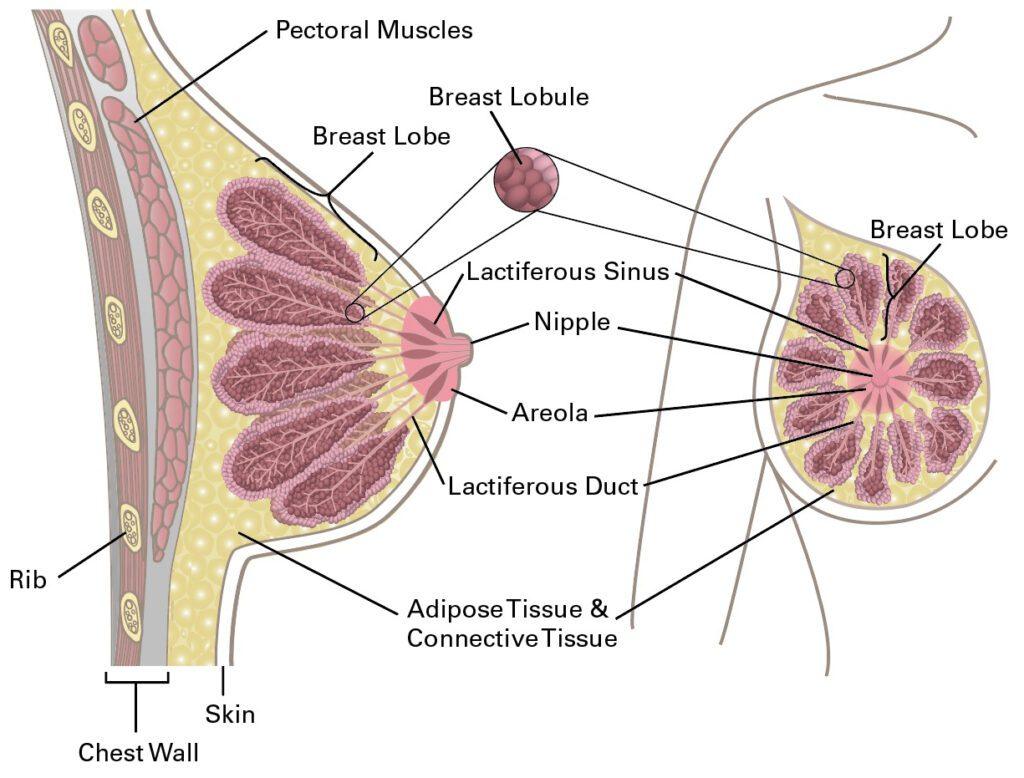

## Features/variables in dataset
32 features are used, including
* **id**: ID number of each entry(patient).
* **radius_mean**: Mean of the breast lobes.

  (Each breast has 15 to 20 sections, called lobes. They are arranged like the petals of a daisy. Each lobe has many smaller structures called lobules. These end in dozens of tiny bulbs that can produce milk.)              
* **texture_mean**: Standard deviation of gray-scale values.
* **perimeter_mean**: Mean of core tumor size.           
* **area_mean**
* **smoothness_mean**: Mean of local variation in radius lengths.
* **compactness_mean**: Mean value for (perimeter^2 / area) - 1.0.
* **concavity_mean**: Mean of the severity of concave portions of the contour.
* **concave points_mean**: Mean for the number of concave portions of the contour.
* **symmetry_mean**:
* **fractal_dimension_mean**: Mean for “coastline approximation” −1.
* **radius_se**: Standard error of `radius` explained as above.
* **texture_se**:
* **perimeter_se**:
* **area_se**:
* **smoothness_se**:
* **compactness_se**:
* **concavity_se**:
* **concave points_se**:
* **symmetry_se**:
* **fractal_dimension_se**:
* **radius_worst**: Worst or largest value of `radius` explained as above.
* **texture_worst**:
* **perimeter_worst**:
* **area_worst**:
* **smoothness_worst**:
* **compactness_worst**:
* **concavity_worst**:
* **concave points_worst**:
* **symmetry_worst**:
* **fractal_dimension_worst**:

## Dataset Information

Breast Cancer Wisconsin Dataset’ from the UCI machine learning repository, which is freely available [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).
* Datasets are linearly separable using all 32 input features.
* Number of Instances: 569
* Class Distribution: 212 Malignant(**M**), 357 Benign(**B**)

#  Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

# Loading the data

In [2]:
df = pd.read_csv('/content/breast-cancer.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [3]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (569, 32)


In [4]:
# Check the complete feature variables
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Check data type of all features
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

**Analysis output**:
* The dataset consists of 569 rows and 32 columns.
* There are numerical and categorical variables.
* No non-values.

# Becoming one with data

### checking for missing values

In [7]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: >

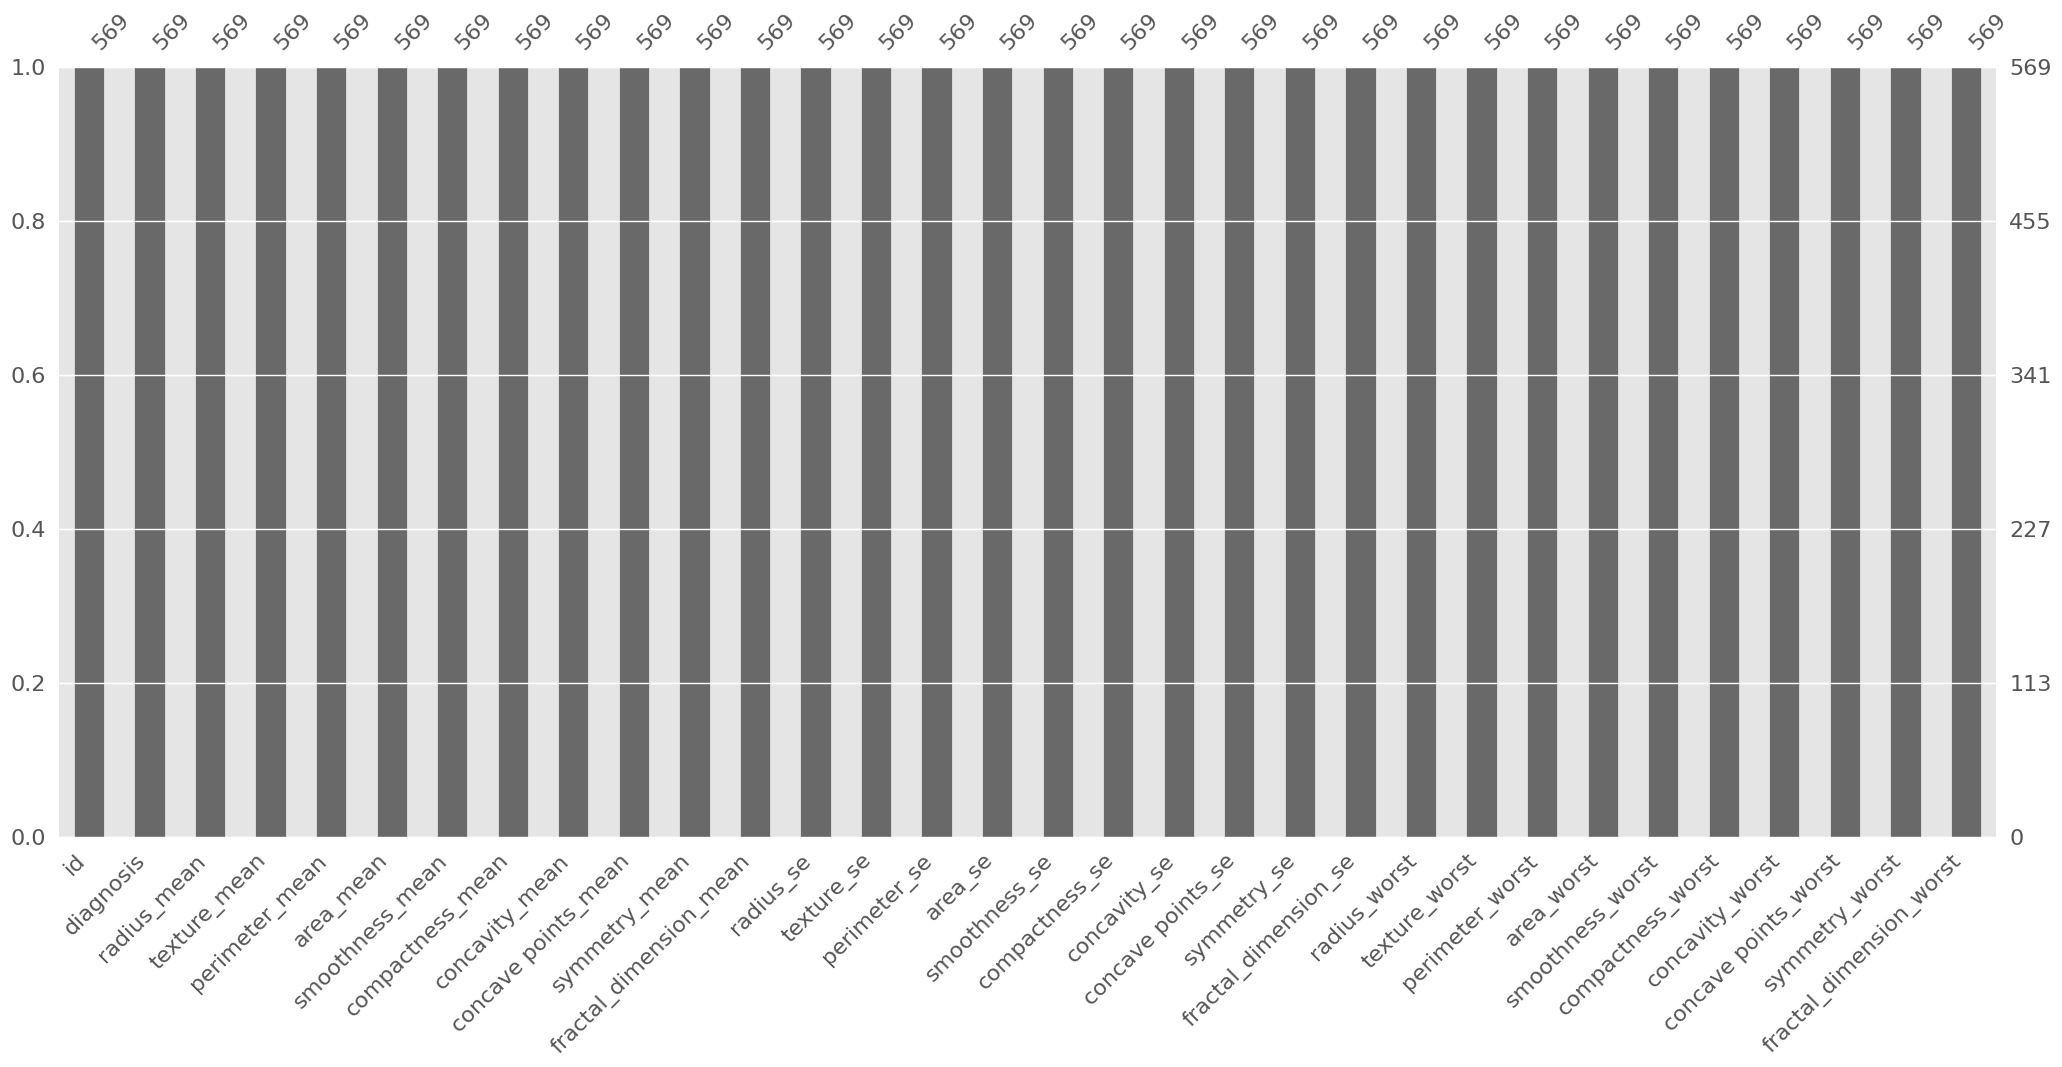

In [8]:
# visualizing null values
msno.bar(df)

### Check categorical feature

In [9]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [10]:
df.diagnosis.nunique()

2

In [11]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

**Analysis output**:

It can be observed that the dataset was not smoothly balanced, and the number of benign tumors was much more than that of malignant tumors.

### Remove irrelevant features

In the dataset, we can see that ID is just a 'name' for each entry, it is not useful for data analysis.

In [12]:
df.drop(['id'], axis = 1, inplace = True)

In [13]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Examing statistics of features

In [15]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

# Exploratory Data Analysis (EDA)

## Uni-variate analysis

### Numerical variables

<Axes: xlabel='radius_mean', ylabel='Density'>

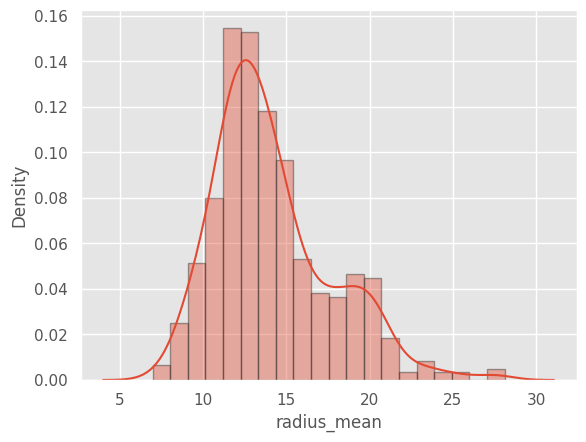

In [16]:
# Check the distribution of "radius_mean" variable
sns.distplot(df.radius_mean, hist_kws=dict(linewidth=1, edgecolor='k'), bins=20)

**Analysis outputs**:
* According to data `describe` method, the median of this data is 13.37, the mean statistic is 14.13.
* Two statistics are slightly different, mean > median which indicates a right skewness that we can observe on the plot.

<Axes: xlabel='texture_mean', ylabel='Density'>

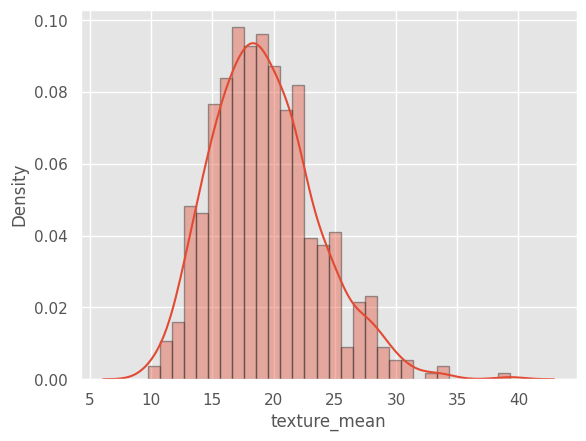

In [17]:
# "texture_mean" variable
sns.distplot(df.texture_mean, hist_kws=dict(linewidth=1, edgecolor='k'), bins=30)

**Analysis outputs**:
* According the `describe` statistics, the min and max values of this "texture_mean" are respectively 9.71 and 39.28, by mathematical calculation, the mean is 24.495 which is differen from 19.289649 obtained by `describe` method.
* It indicateds that there are more values that are smaller than "midpoint" if we take min and max value as basis.
* The data average - 19.289649 sits in between the 25% and 75% quarters, we can say that the "radius_mean" variable is prone to the normal distribution.

<Axes: xlabel='perimeter_mean', ylabel='Density'>

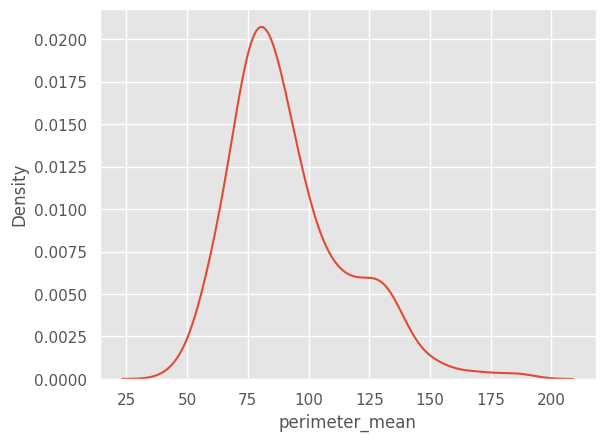

In [18]:
# "perimeter_mean" variable
sns.distplot(df['perimeter_mean'], hist=False)

**Analysis outputs**:
* The minimum value for "perimeter_mean" variable is 43.79, maximum is 188.5, the midpoint of these two values is 116.145, while the major average is 91.969.
* When viewed, the mean is slight to the left of the midpoint of the minimum and maximum value, we can say the the distriution is positively skewed as it's shown on the plot.

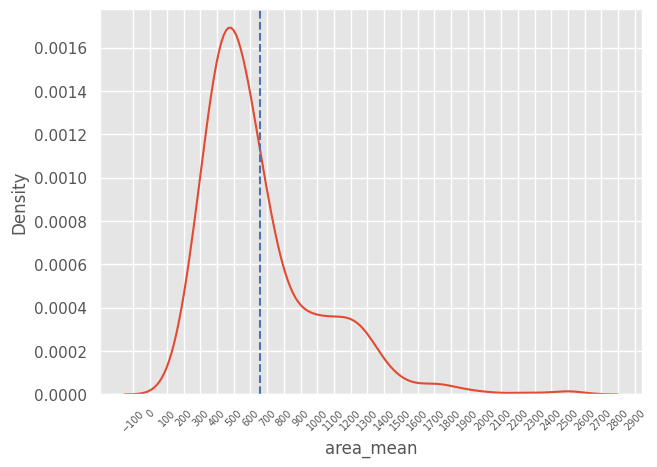

In [19]:
# "area_mean" variable
x, y = plt.subplots(figsize=(7, 5))
sns.distplot(df['area_mean'], hist=False, ax=y)
ax = plt.gca()
ax.set_xticks(np.arange(-100, 3000, 100))
y.axvline(df.area_mean.mean(), color='b', ls='--')
plt.xticks(rotation=45, size=7)
plt.show()

**Analysis outputs**:
* From statistics we got the 50% quantile with value 551.1 which is smaller than the major average 654.889.
* They are somewhat different from each other, as a result, the data tends to be right skewed.

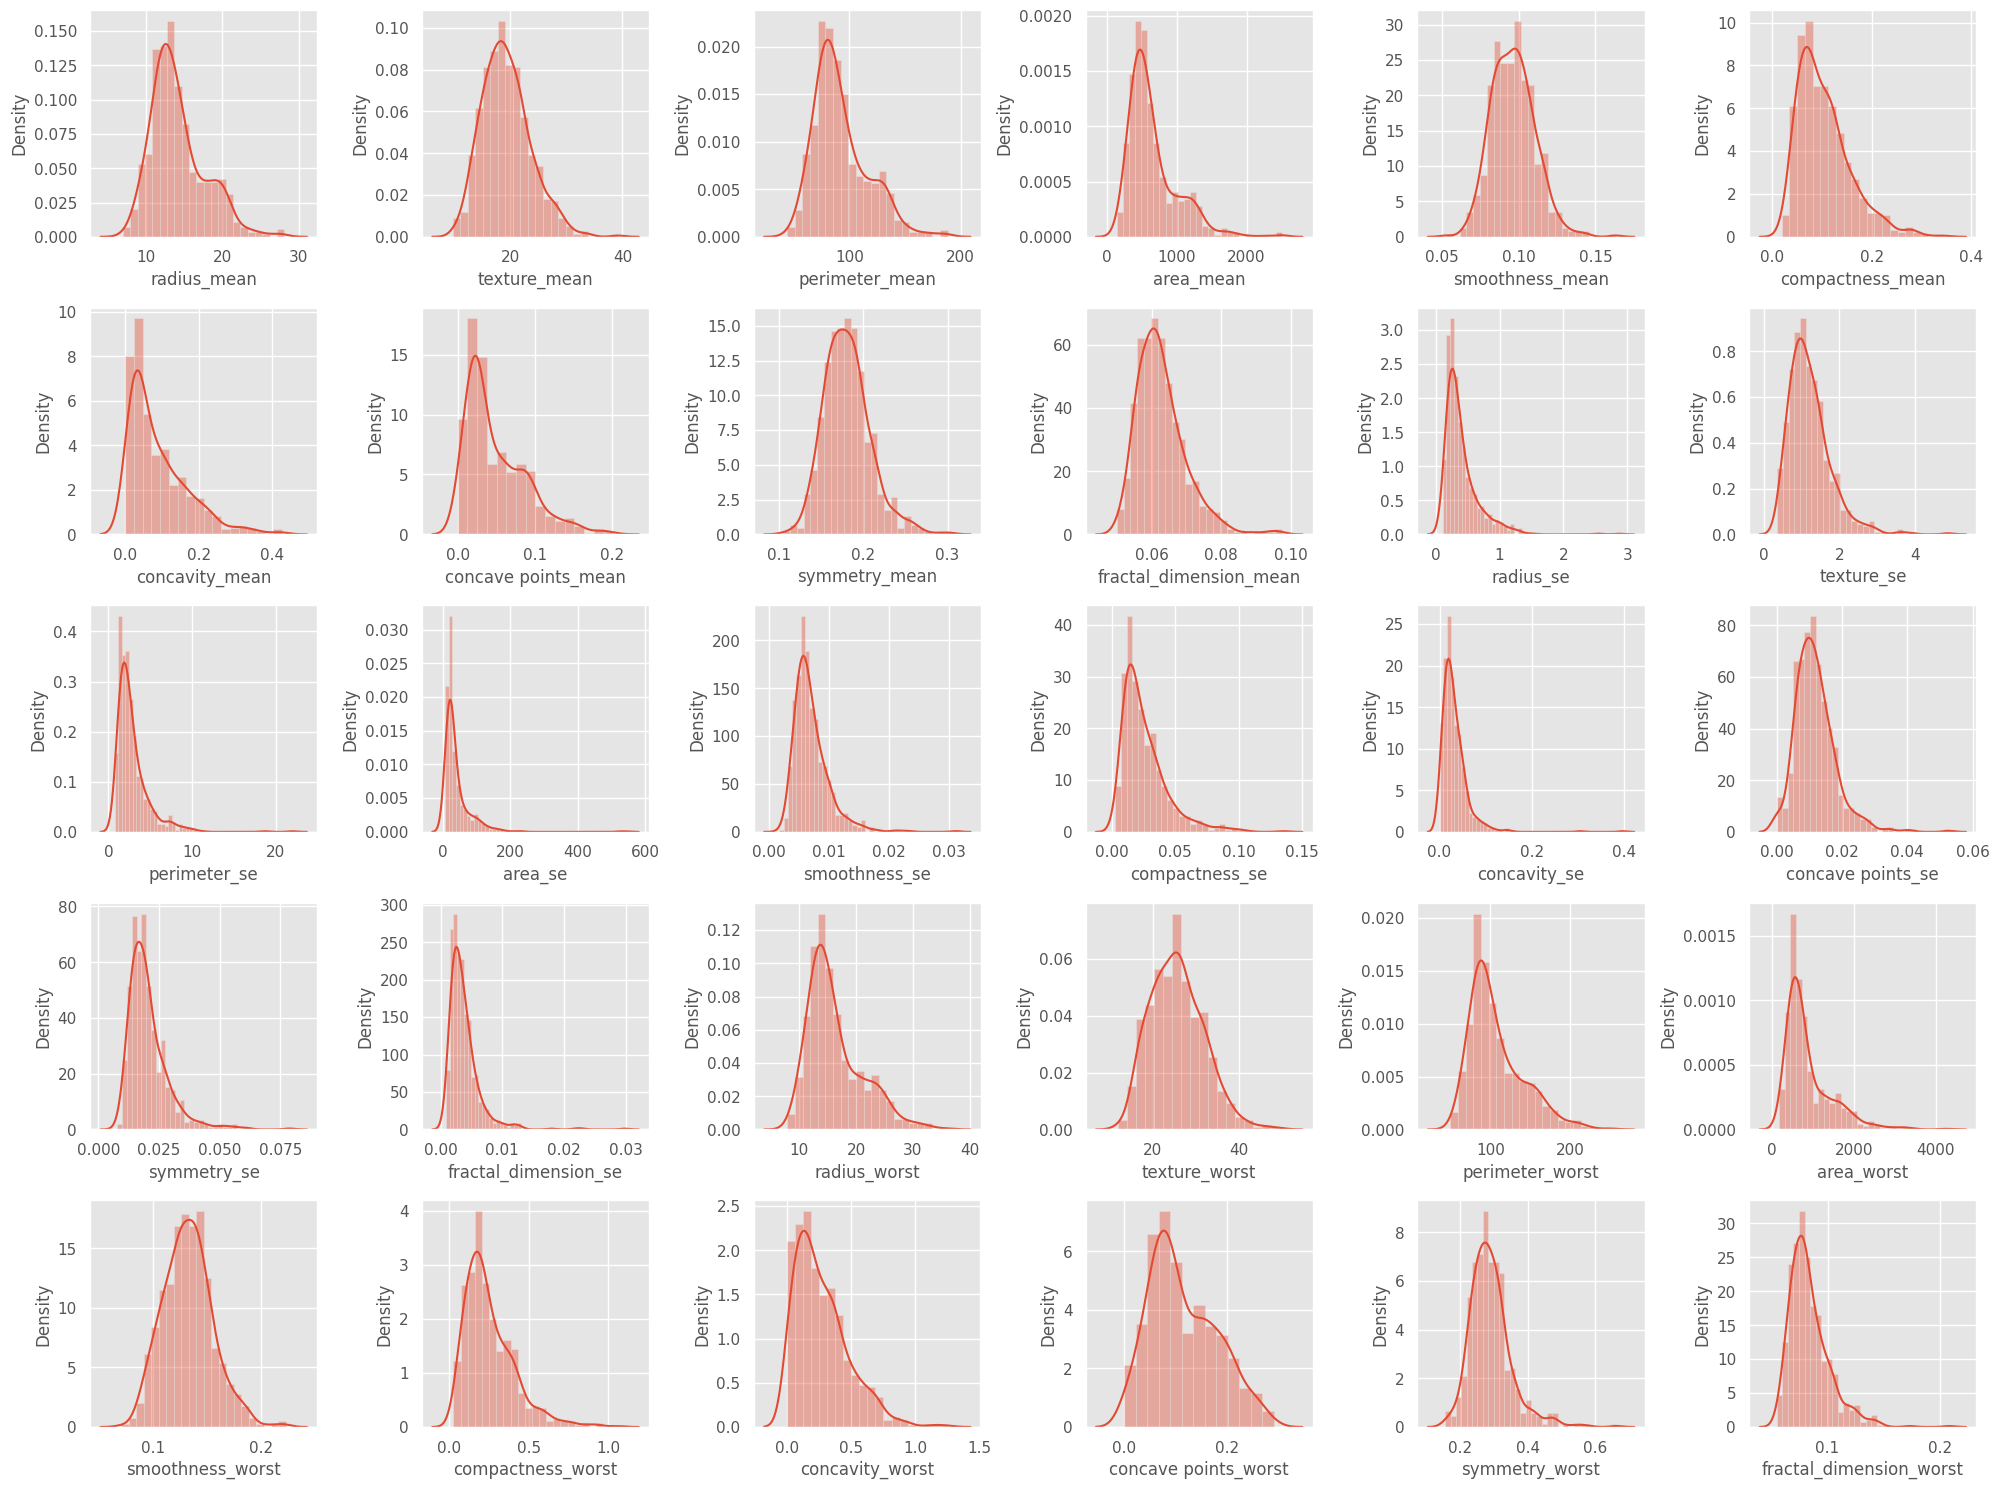

In [20]:
# A comprehensive plot for all features to get a brief and thorough view of the data distribution
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df.columns[1:]:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)

    plotnumber += 1

plt.tight_layout()
plt.show()

### Categorical variables

In [21]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [22]:
target_classes = ['Benign', 'Malignant']
target_classes

['Benign', 'Malignant']

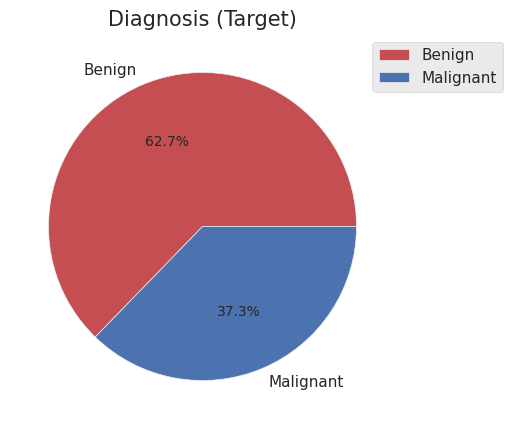

In [23]:
plt.figure(figsize=(5, 5))
plt.pie(df.diagnosis.value_counts(), labels=target_classes, autopct='%1.1f%%', colors=['r', 'b'])
plt.title('Diagnosis (Target)', fontsize=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

**Analysis output**:
* 62.7% of the subjects are diagnozed as benign (**B**), 37.3% are diagnozed as malignant.
* Benign cases are nearly twice the malignant ones.
* The dataset is not well balanced.

## Bi-variate analysis

### Separating features and targets

In [24]:
y = df['diagnosis']
X = df.drop('diagnosis', axis=1)

In [25]:
X.shape, y.shape

((569, 30), (569,))

In [26]:
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Numerical variable - categorical variable FacetGrid analysis

In [27]:
var_name = list(X.columns)
var_name

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [28]:
var_name.append('diagnosis')
var_name

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'diagnosis']

In [29]:
df[var_name]

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                  0.2654          0.4601                  0.11890          M  
1                  0.1860          0.2750                  0.08902          M  
2                  0.2430          0.3613                  0.08758          M  
3                  0.2575          0.6638                  0.17300          M  
4                  0.1625          0.2364        

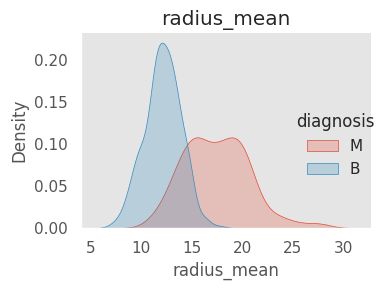

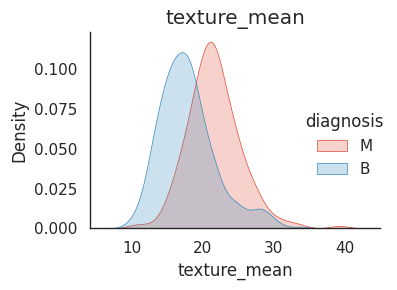

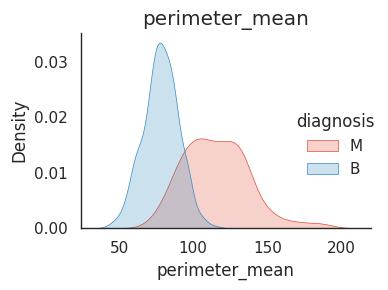

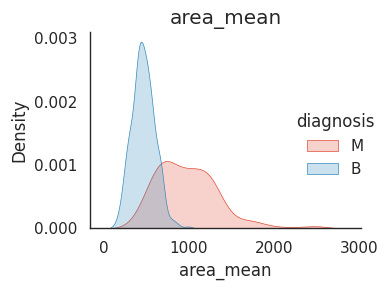

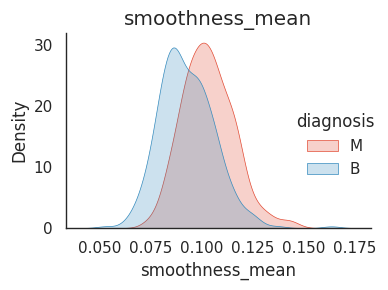

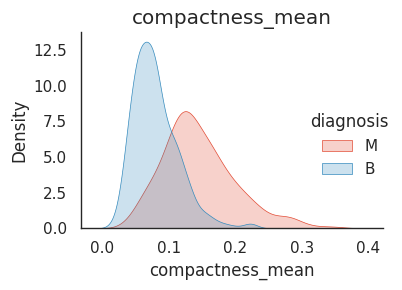

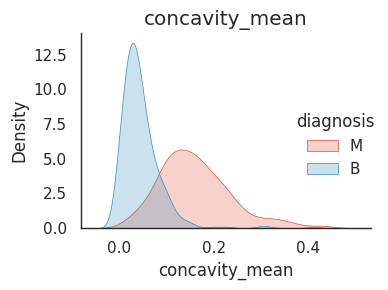

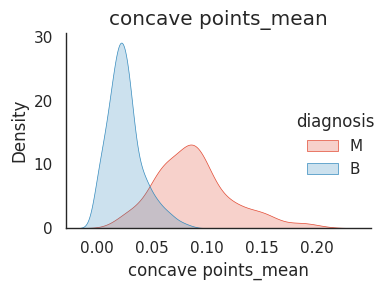

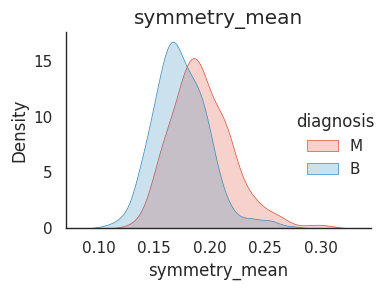

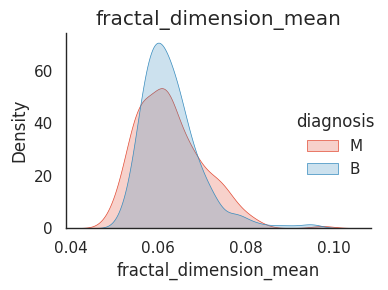

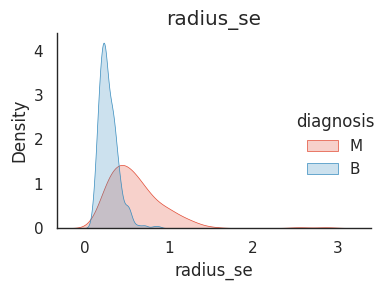

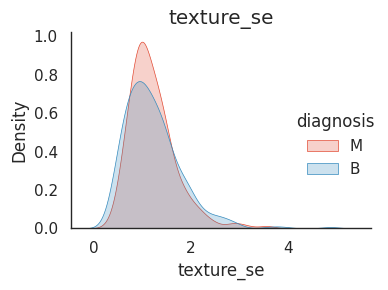

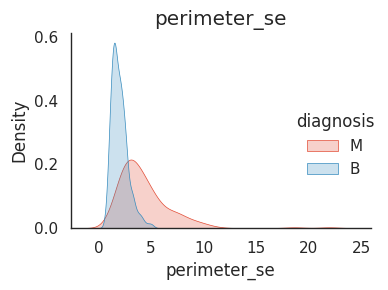

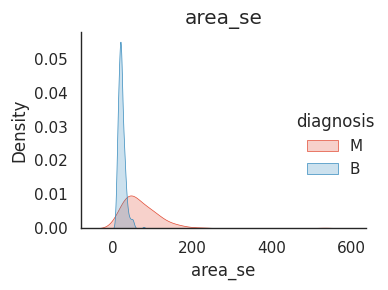

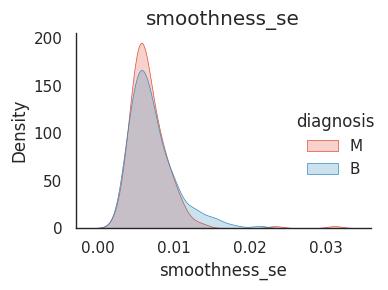

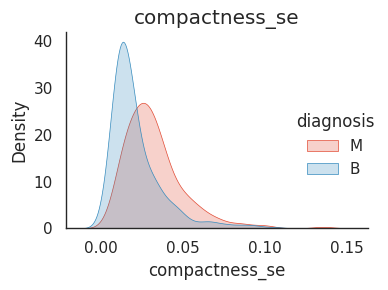

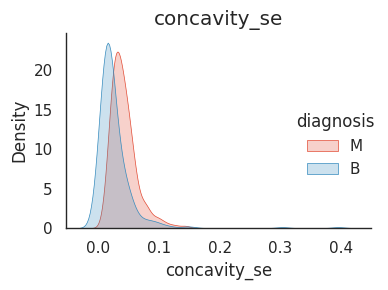

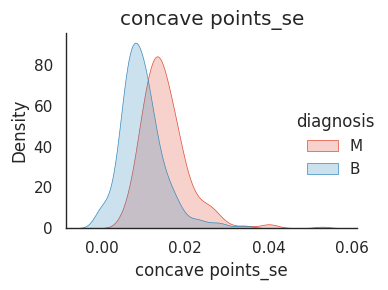

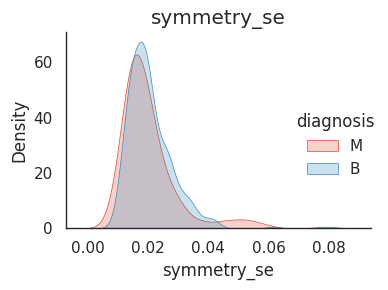

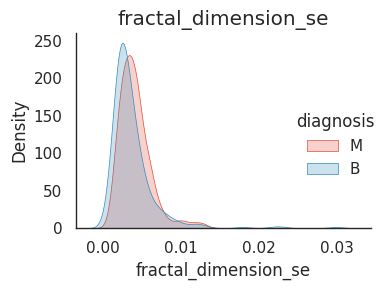

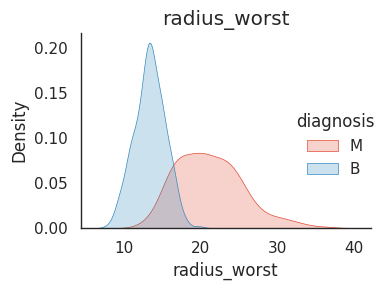

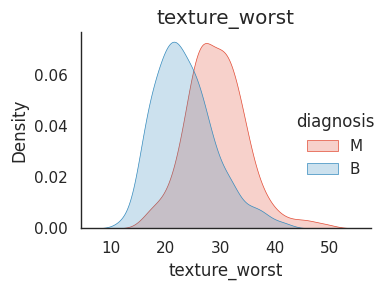

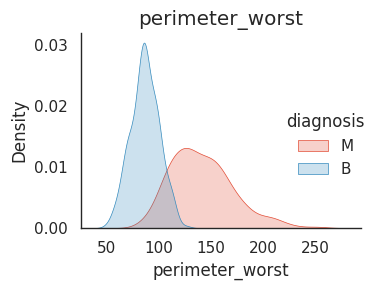

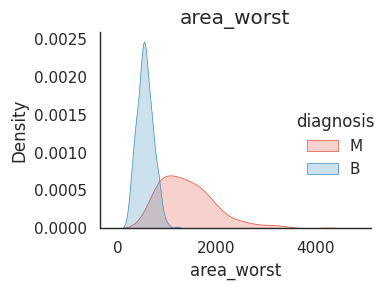

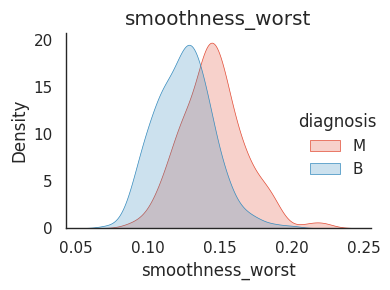

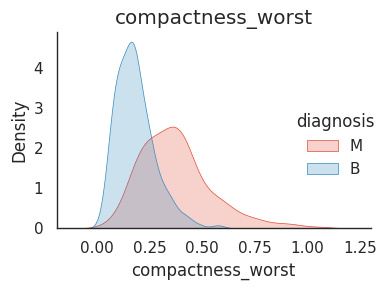

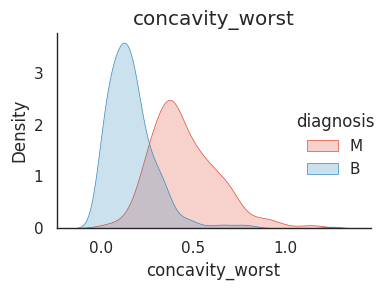

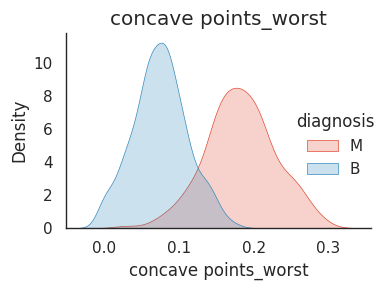

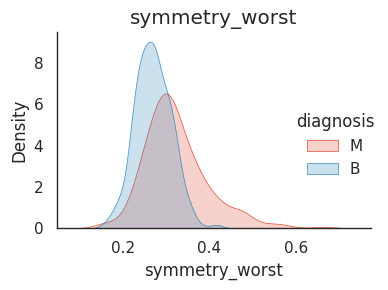

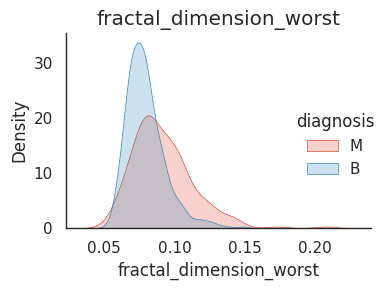

In [30]:
for i, var in enumerate(df.columns):
  if i == 0:
    continue
  else:
    g = sns.FacetGrid(df, hue='diagnosis')
    g.map(sns.kdeplot, var, shade=True)
    g.add_legend()
    sns.set_style("white")
    plt.title(var)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

**Analysis outputs**:
* The KDE plot show the density of feature for each target variable.
* In this case, there are two colored humps representing two categories: benign/malignant.
* If two humps are well seperated and not overlapping, the this feature is well-correlated with the target.
* If two humps are opvepalling and not obviously separated, the this feature is equally common to the target, thus not well-correlated with the target.


We can see that:

1. The distinct humps separation in features `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean`, and `concave point_mean` are well separated, indicate a significant separation, highlighting the crucial role these features play in classification.
2. Following its feature naming logic, it is reasonable to consider the importance of features such as  `radius_se`, `perimeter_se`, `area_se`, `radius_worst`, `perimeter_worst`, `area_worst`, `concavity_worst`, and `concave point_worst`.
3. While the other features can be considered equally common to the target.

### Correlation between numerical variables

In [31]:
df.corr()

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

In [32]:
# Check correlation between features and target
df.corr().iloc[:, [-1]]

fractal_dimension_worst
radius_mean                             0.007066
texture_mean                            0.119205
perimeter_mean                          0.051019
area_mean                               0.003738
smoothness_mean                         0.499316
compactness_mean                        0.687382
concavity_mean                          0.514930
concave points_mean                     0.368661
symmetry_mean                           0.438413
fractal_dimension_mean                  0.767297
radius_se                               0.049559
texture_se                             -0.045655
perimeter_se                            0.085433
area_se                                 0.017539
smoothness_se                           0.101480
compactness_se                          0.590973
concavity_se                            0.439329
concave points_se                       0.310655
symmetry_se                             0.078079
fractal_dimension_se                    0.591328
radius_worst                            0.093492
texture_worst                           0.219122
perimeter_worst                         0.138957
area_worst                              0.079647
smoothness_worst                        0.617624
compactness_worst                       0.810455
concavity_worst                         0.686511
concave points_worst                    0.511114
symmetry_worst                          0.537848
fractal_dimension_worst                 1.000000

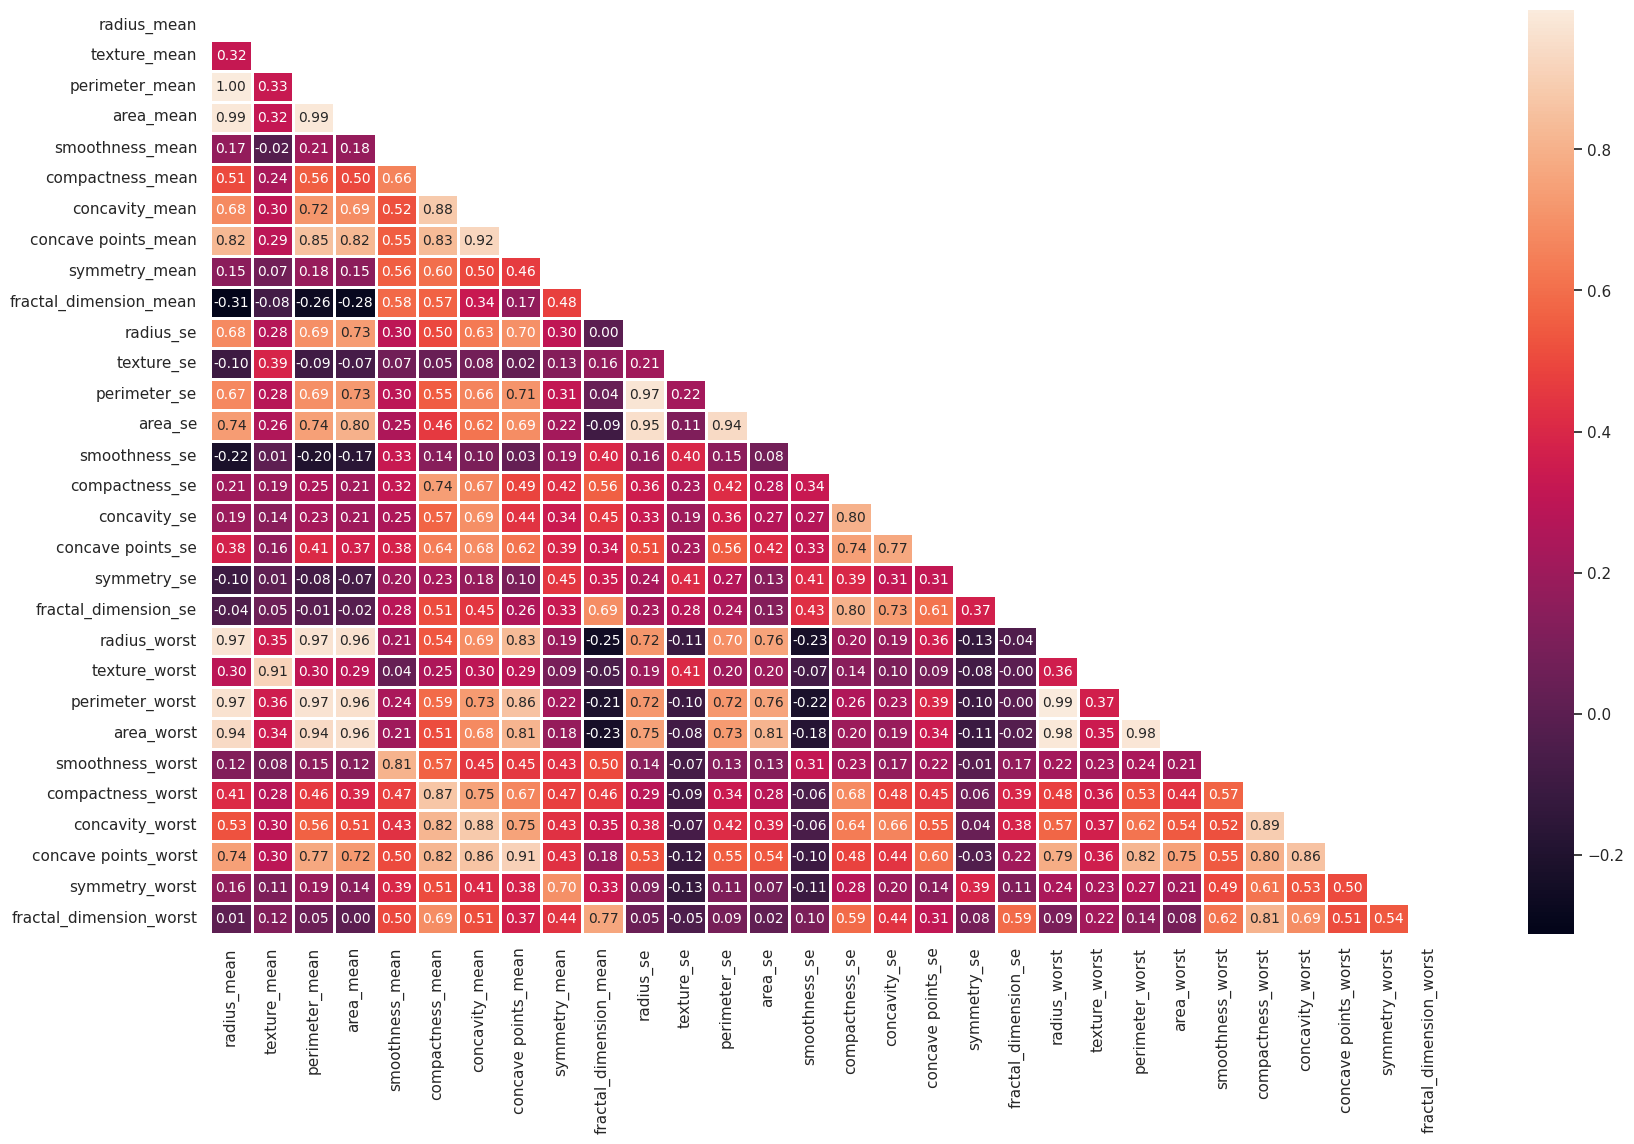

In [33]:
# Plot heatmap for visualization

plt.figure(figsize = (20, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [34]:
# Write a function to visualize Bi-variate correlation
def plot_swamp(data, var, hue='diagnosis'):
  plt.figure(figsize=(10, 7))
  sns.swarmplot(data=data, x=var, hue='diagnosis')
  plt.show()

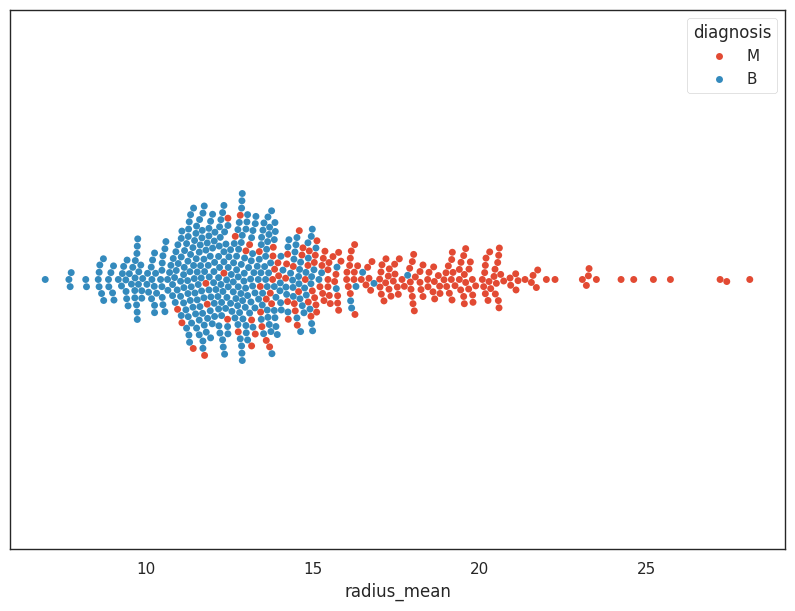

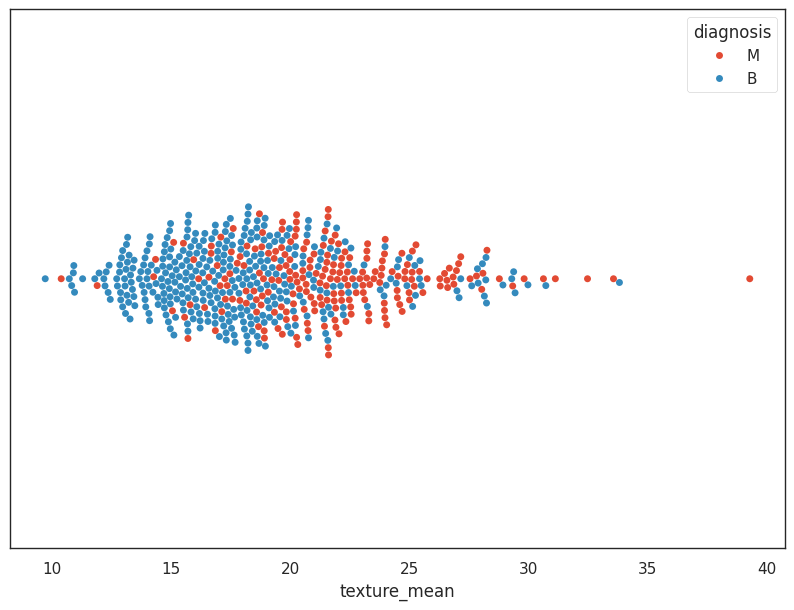

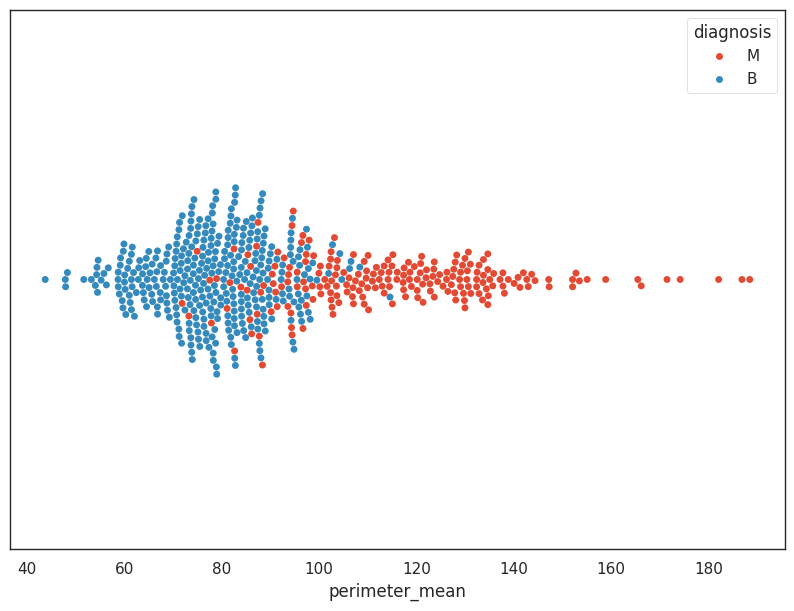

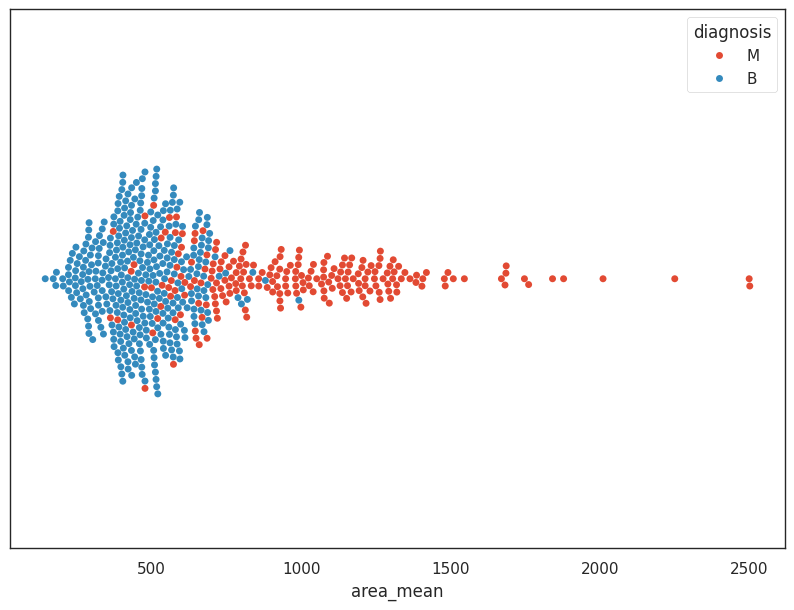

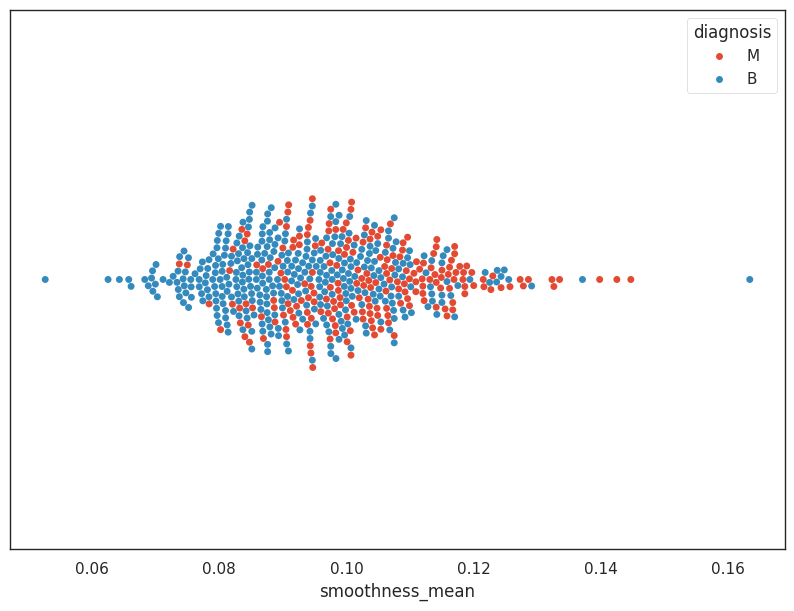

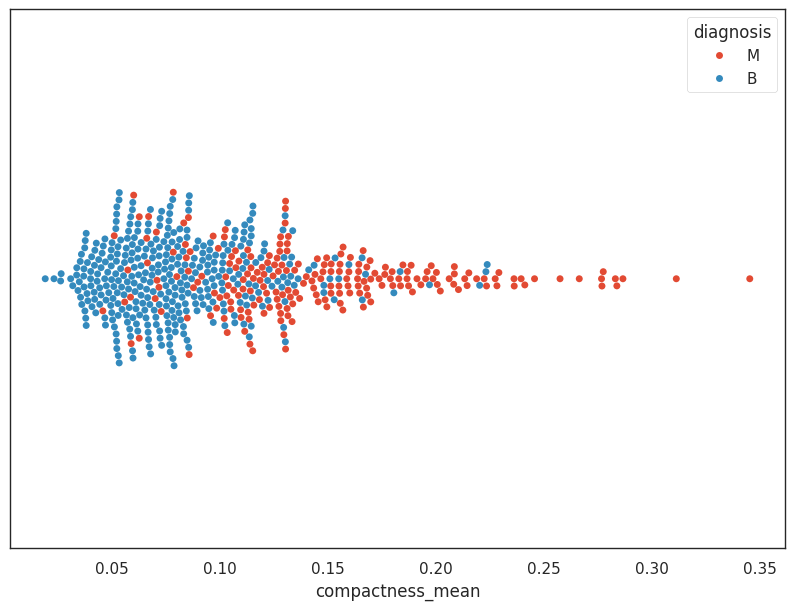

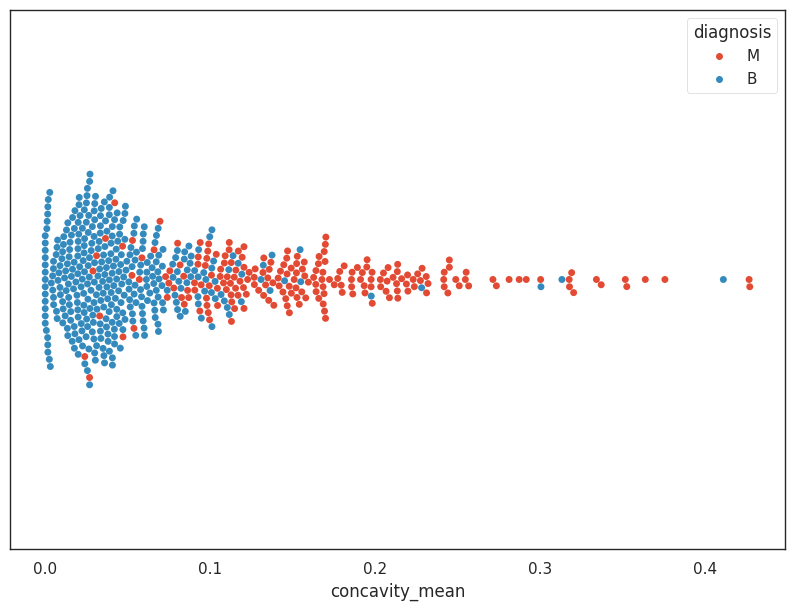

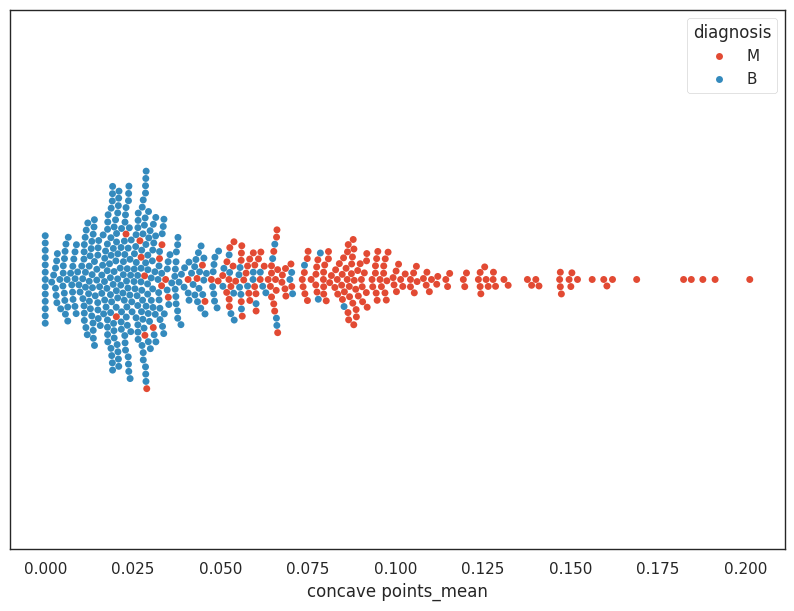

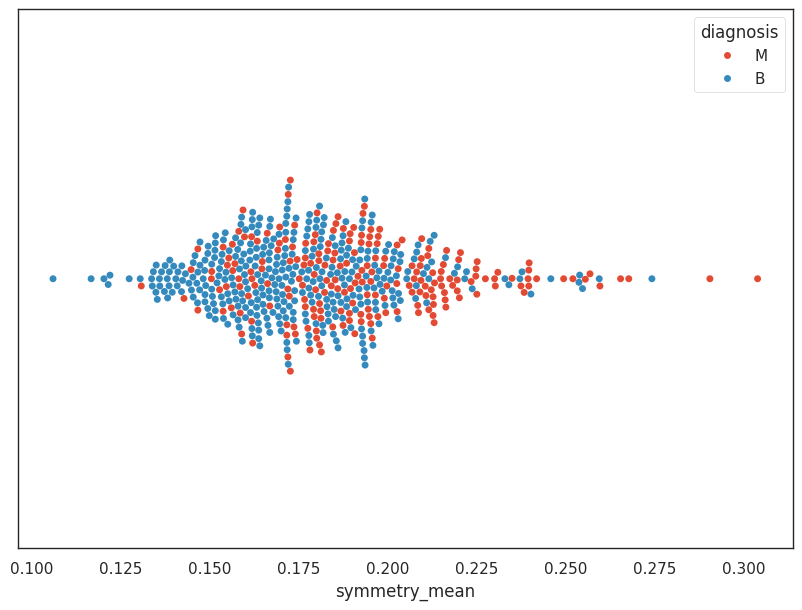

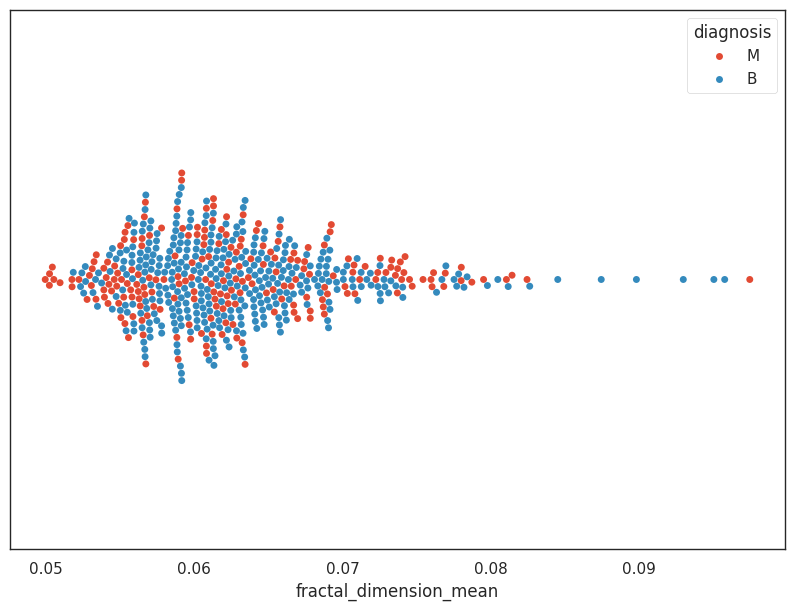

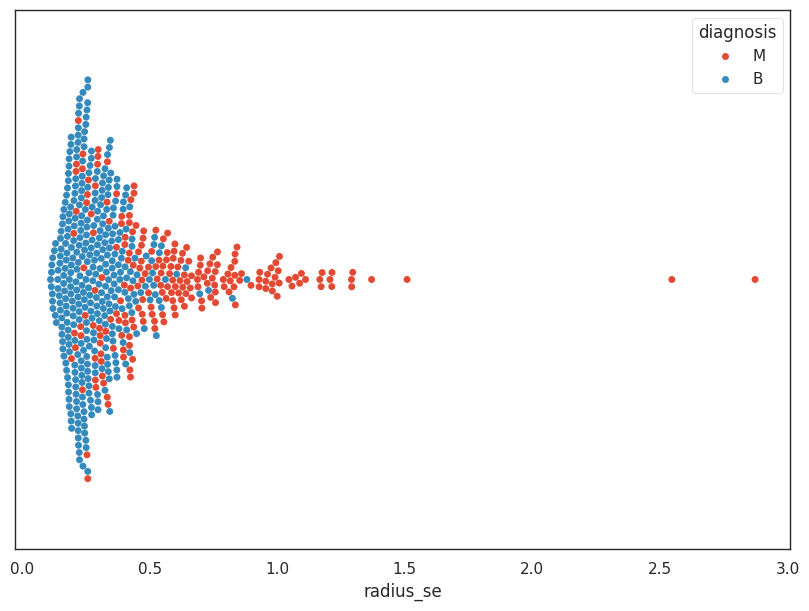

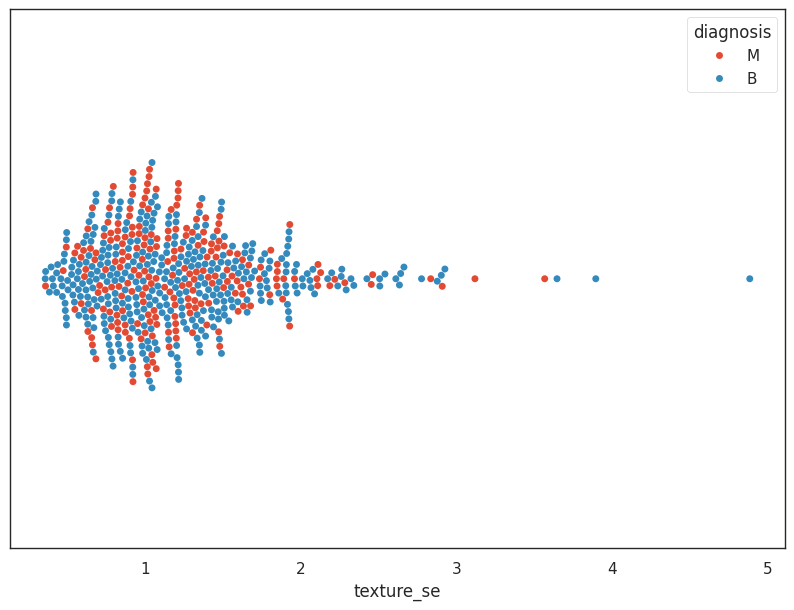

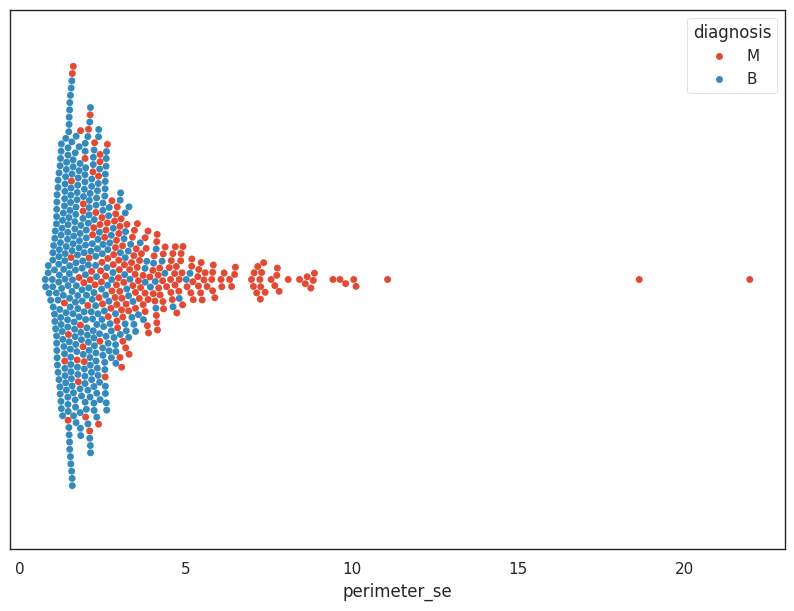

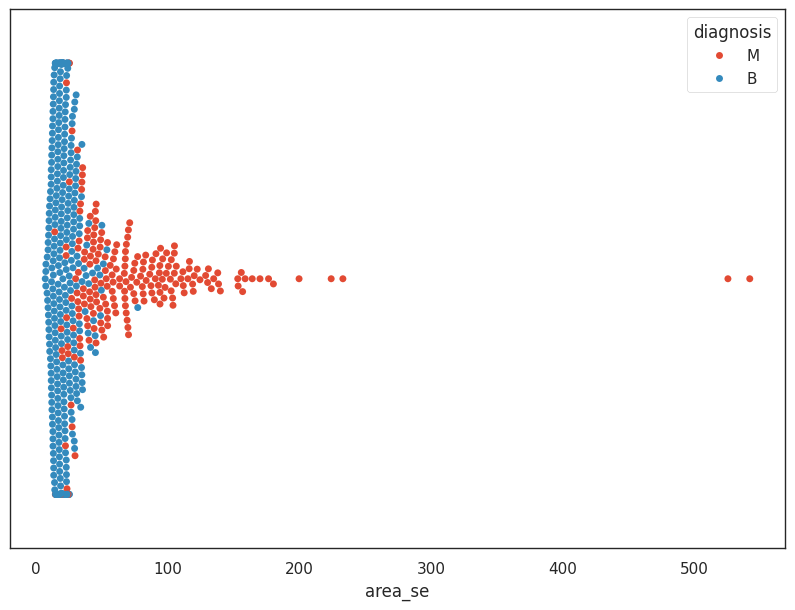

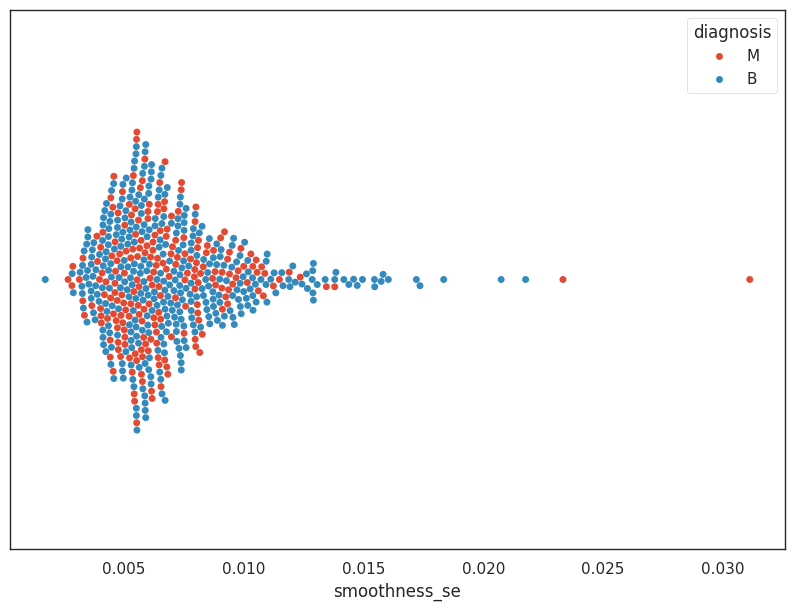

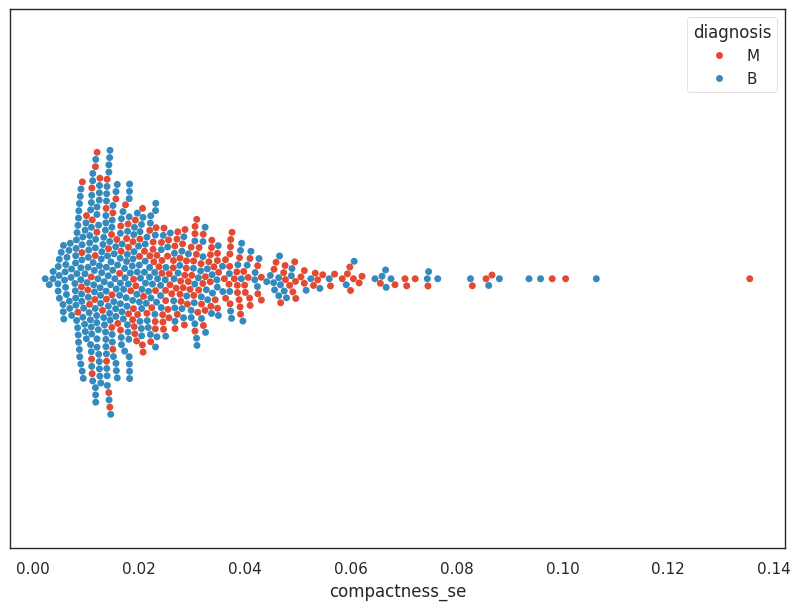

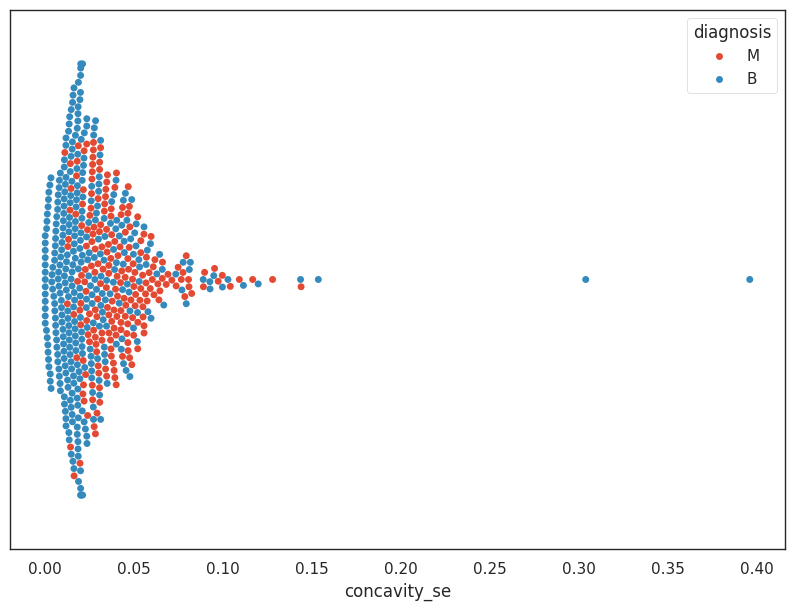

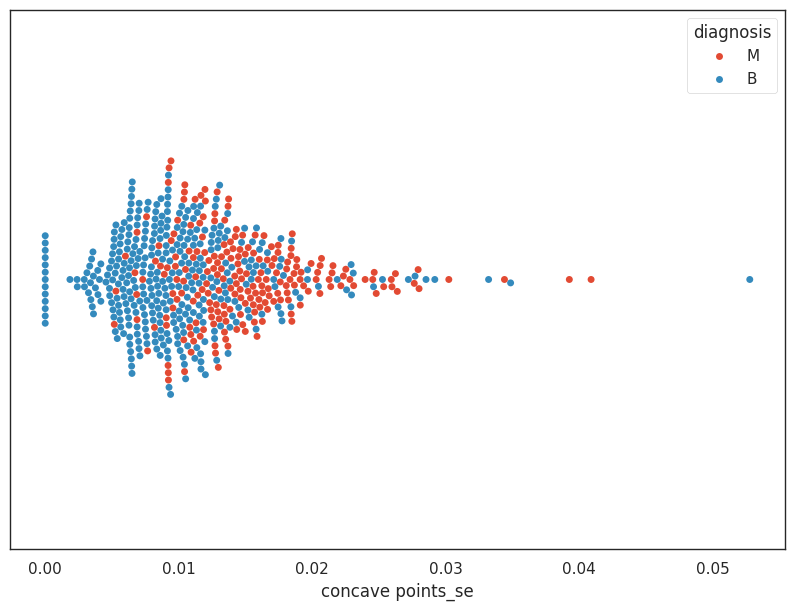

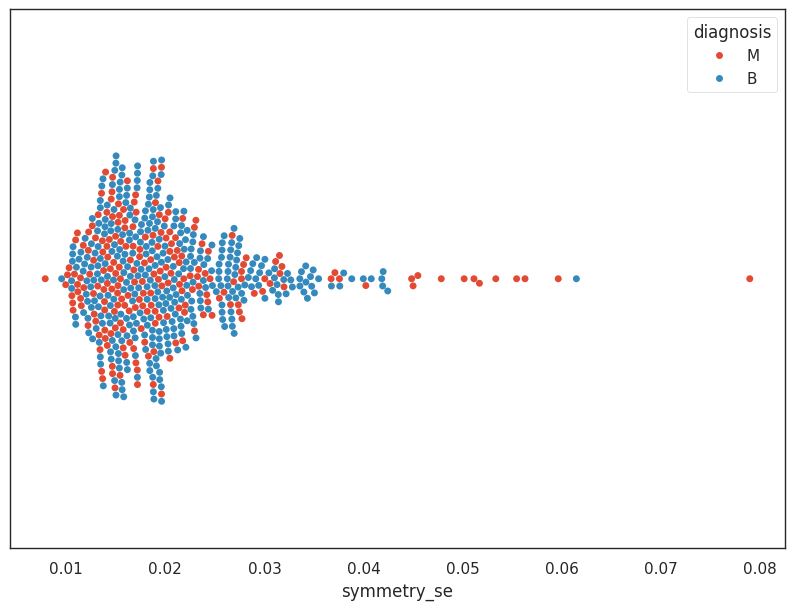

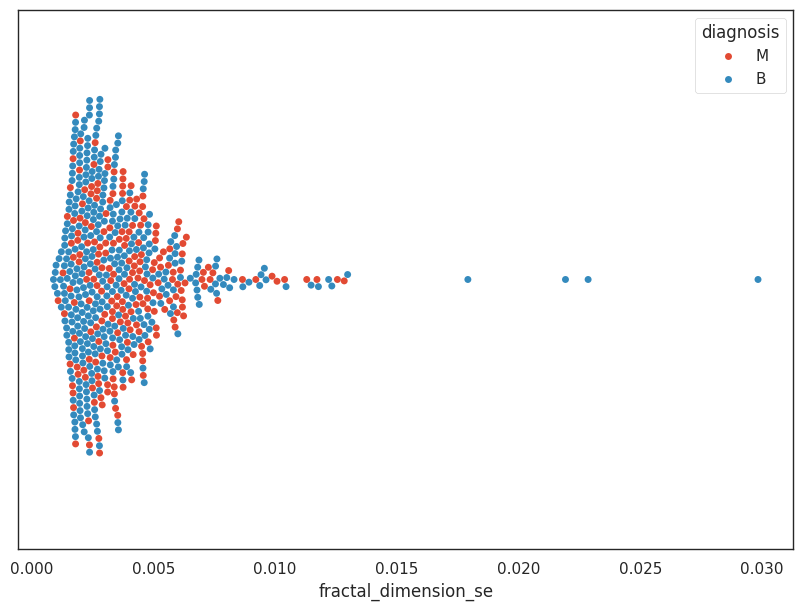

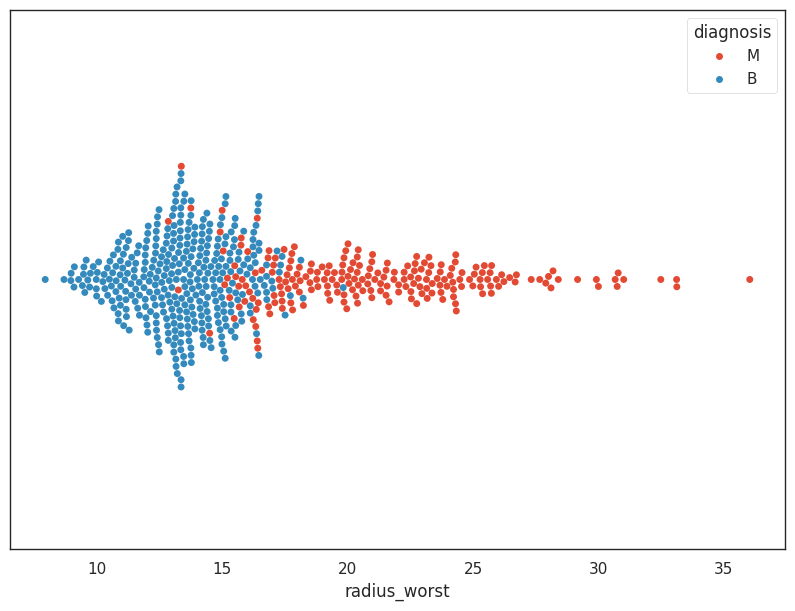

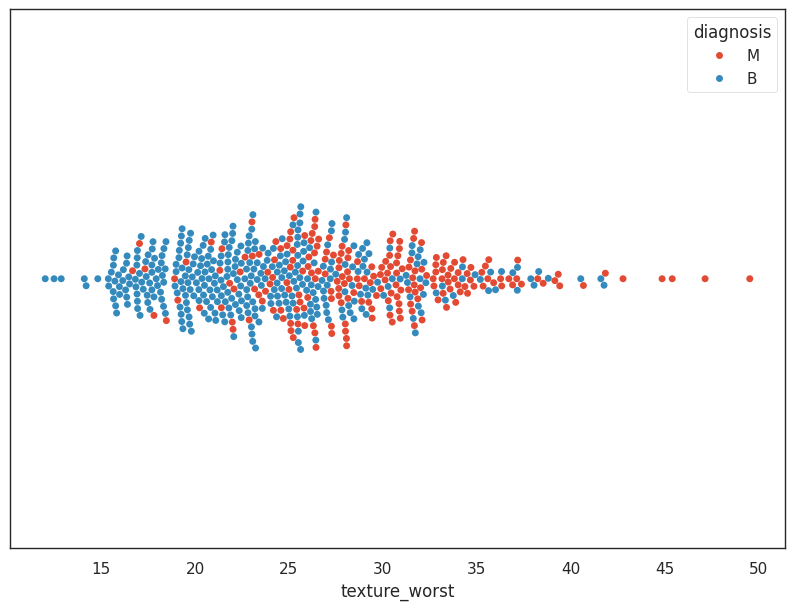

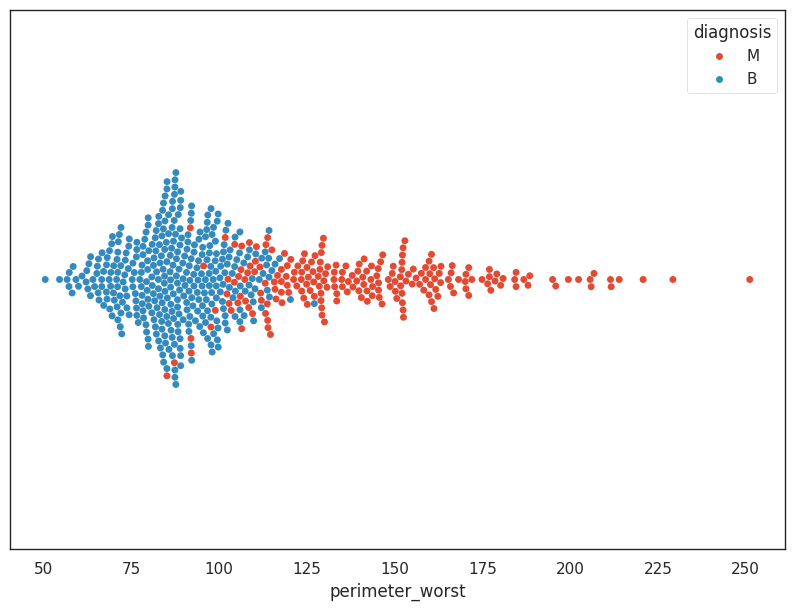

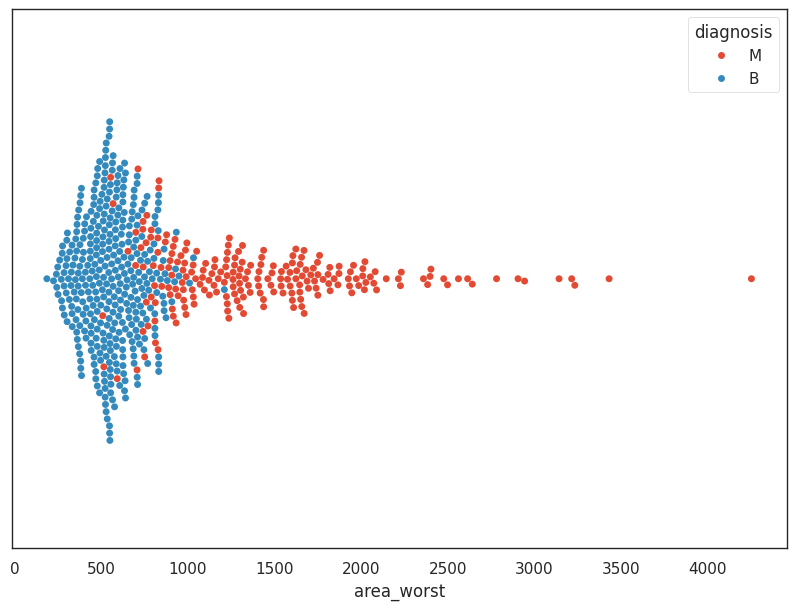

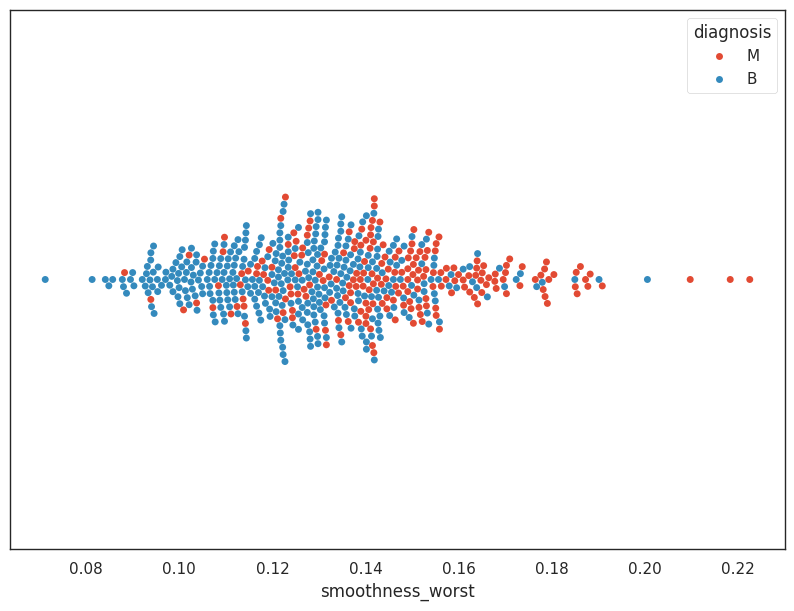

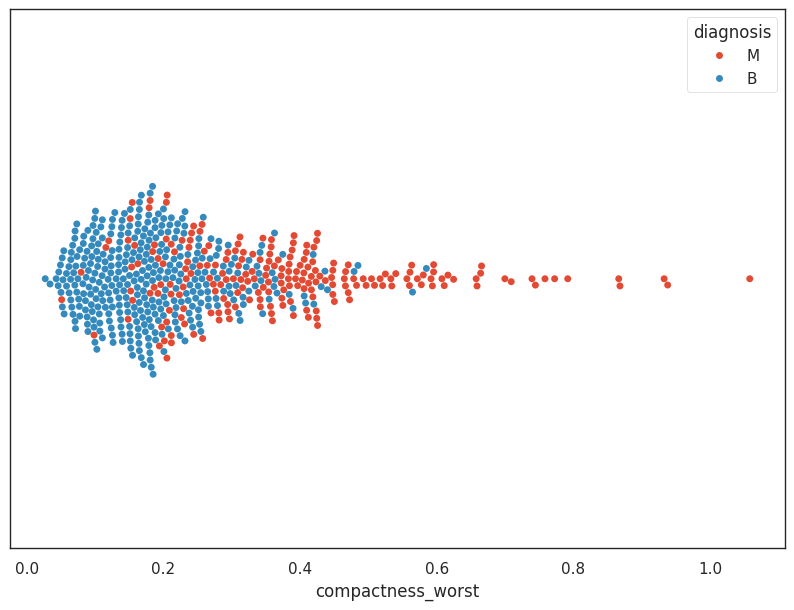

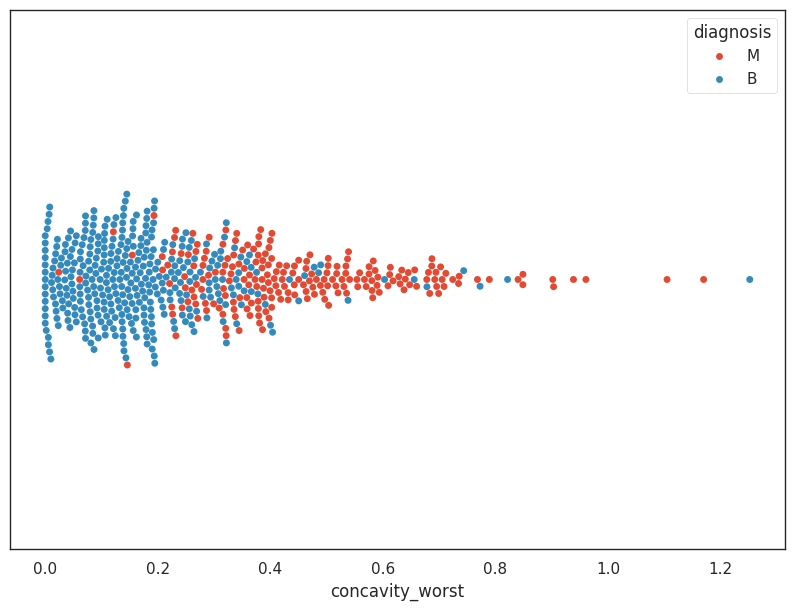

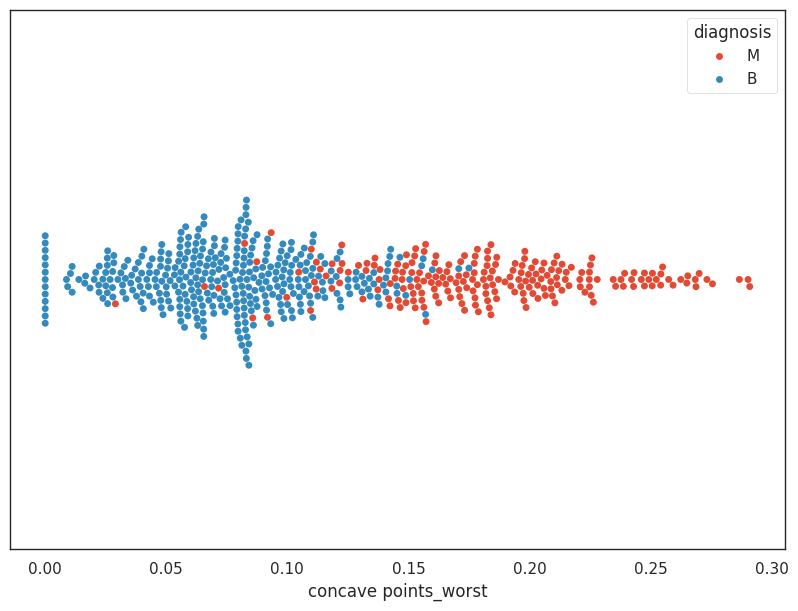

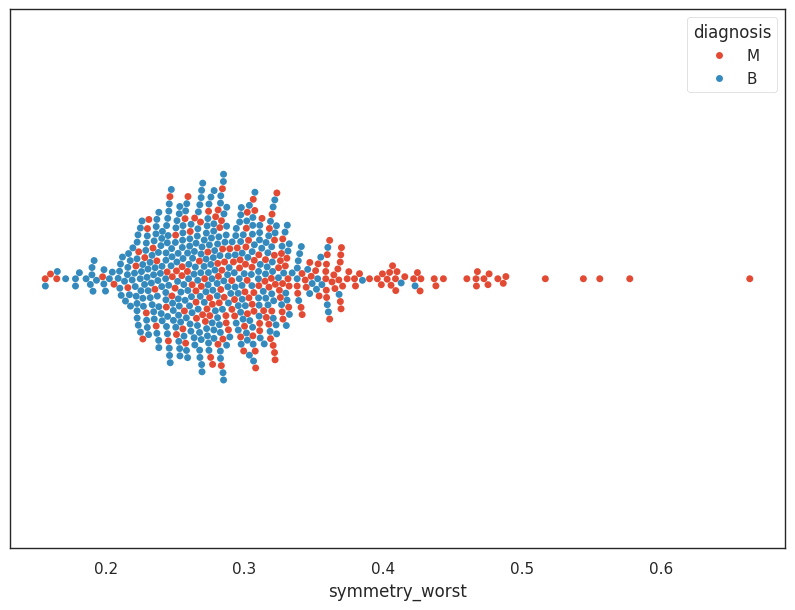

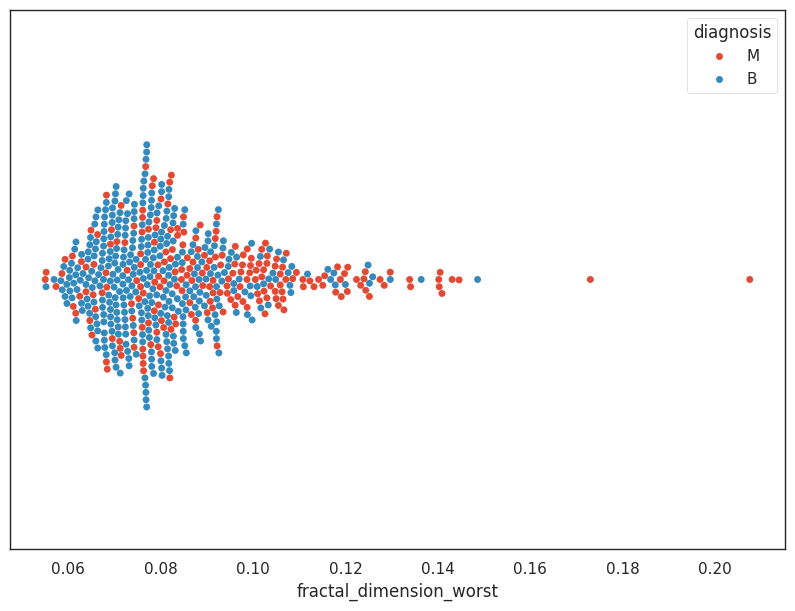

In [35]:
for var in X.columns:
  plot_swamp(df, var)

# Preprocessing data for modelling

## Dropping highly correlated columns

<Axes: >

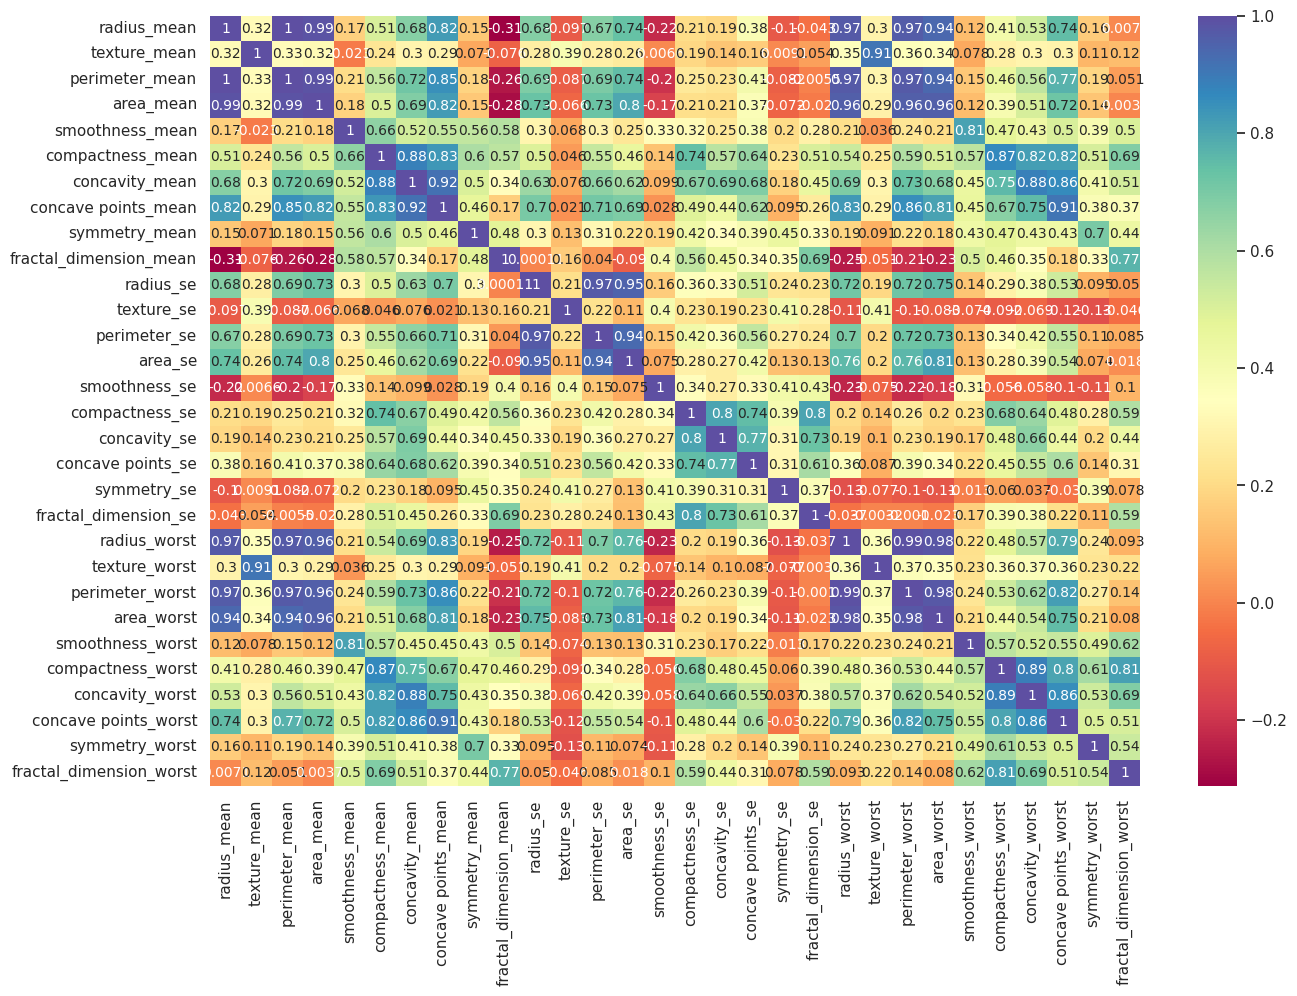

In [36]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='Spectral', annot=True)

In [37]:
df.corr().iloc[:,-1]

radius_mean                0.007066
texture_mean               0.119205
perimeter_mean             0.051019
area_mean                  0.003738
smoothness_mean            0.499316
compactness_mean           0.687382
concavity_mean             0.514930
concave points_mean        0.368661
symmetry_mean              0.438413
fractal_dimension_mean     0.767297
radius_se                  0.049559
texture_se                -0.045655
perimeter_se               0.085433
area_se                    0.017539
smoothness_se              0.101480
compactness_se             0.590973
concavity_se               0.439329
concave points_se          0.310655
symmetry_se                0.078079
fractal_dimension_se       0.591328
radius_worst               0.093492
texture_worst              0.219122
perimeter_worst            0.138957
area_worst                 0.079647
smoothness_worst           0.617624
compactness_worst          0.810455
concavity_worst            0.686511
concave points_worst       0

In machine learning, it is advisable to remove highly correlated features for several reasons.
1. These features often provide redundant information, contributing little to predictive performance.
2. Multicollinearity can arise, complicating the isolation of individual variable effects. Removing correlated features improves model interpretability and computational efficiency while preventing overfitting.
3. A simplified model is more robust and generalizes better to diverse datasets, as it focuses on essential information and avoids unnecessary complexity during training.

We can see that there are many columns which are very highly correlated which causes multicollinearity so we have to remove highly correlated features.

**Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlate.**

In [38]:
# Removing highly correlated features

corr_matrix = df.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.92)]

df_processed = df.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {df_processed.shape[1]} columns.")

The reduced dataframe has 23 columns.


In [39]:
df_processed.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0         M         10.38          0.11840           0.27760   
1         M         17.77          0.08474           0.07864   
2         M         21.25          0.10960           0.15990   
3         M         20.38          0.14250           0.28390   
4         M         14.34          0.10030           0.13280   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2597                 0.09744      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   area_se  smoothness_se  ...  symmetry_se  fractal_dimension_se  \
0   153.40       0.006399  ...      0.03003              0.006193   
1    74.08       0.005225  ...      0.01389              0.003532   
2    94.03       0.006150  ...      0.02250              0.004571   
3    27.23       0.009110  ...      0.05963              0.009208   
4    94.44       0.011490  ...      0.01756              0.005115   

   texture_worst  area_worst  smoothness_worst  compactness_worst  \
0          17.33      2019.0            0.1622             0.6656   
1          23.41      1956.0            0.1238             0.1866   
2          25.53      1709.0            0.1444             0.4245   
3          26.50       567.7            0.2098             0.8663   
4          16.67      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 23 columns]

In [40]:
to_drop

['radius_mean',
 'perimeter_mean',
 'area_mean',
 'concavity_mean',
 'radius_se',
 'perimeter_se',
 'radius_worst',
 'perimeter_worst']

## Transformation Operations on asymmetrical data

Skewed distributed data, where the distribution of values is imbalanced, can impact machine learning in various ways.
* It can introduce bias in model predictions, particularly favoring the majority values and resulting in poor performance on minority values.
* Skewed data may mislead accuracy metrics, making them less reliable indicators of overall model performance. Generalization to new, unseen data may be compromised, as the model might struggle to capture patterns in the less frequent values.
* Skewed distributions can also affect feature importance, sensitivity to outliers, and training dynamics.


**As a general guideline, a skewness value between −1 and +1 is considered excellent, but a value between −2 and +2 is generally considered acceptable. Values beyond −2 and +2 are considered indicative of substantial nonnormality."** (Hair et al., 2022, p. 66).

In [41]:
# Check the skewness of variables
skewness = df_processed.skew().sort_values(ascending=False).to_frame()
skewness

0
area_se                  5.447186
concavity_se             5.110463
fractal_dimension_se     3.923969
smoothness_se            2.314450
symmetry_se              2.195133
compactness_se           1.902221
area_worst               1.859373
fractal_dimension_worst  1.662579
texture_se               1.646444
compactness_worst        1.473555
concave points_se        1.444678
symmetry_worst           1.433928
fractal_dimension_mean   1.304489
compactness_mean         1.190123
concave points_mean      1.171180
concavity_worst          1.150237
symmetry_mean            0.725609
texture_mean             0.650450
texture_worst            0.498321
concave points_worst     0.492616
smoothness_mean          0.456324
smoothness_worst         0.415426

**Analysis outputs**:
* According the the general guideline, there are 7 variables
with raletively hign skewness level and there are all positive.

* For positive skewed data, commonly used transformation are **Log Transformation** and **Square Root Transformation**.

In [42]:
skewed_var = list(skewness[skewness.values > 2].index)
skewed_var

['area_se',
 'concavity_se',
 'fractal_dimension_se',
 'smoothness_se',
 'symmetry_se']

In [43]:
# Perform different transformations
df_ = df_processed.copy()
for var in skewed_var:
  df_[f'{var}_log'] = np.log(df_processed[var]+1)
  df_[f'{var}_sqrt'] = np.sqrt(df_processed[var])

In [44]:
df_.iloc[:,-10:]

area_se_log  area_se_sqrt  concavity_se_log  concavity_se_sqrt  \
0       5.039547     12.385475          0.052336           0.231797   
1       4.318554      8.606974          0.018429           0.136382   
2       4.554193      9.696907          0.037604           0.195755   
3       3.340385      5.218237          0.055066           0.237929   
4       4.558498      9.718024          0.055321           0.238495   
..           ...           ...               ...                ...   
564     5.073297     12.597619          0.050674           0.227991   
565     4.605570      9.951884          0.038740           0.198746   
566     3.902982      6.967783          0.046215           0.217486   
567     4.468434      9.285473          0.068752           0.266777   
568     3.003204      4.376071          0.000000           0.000000   

     fractal_dimension_se_log  fractal_dimension_se_sqrt  smoothness_se_log  \
0                    0.006174                   0.078696           0.006379   
1                    0.003526                   0.059431           0.005211   
2                    0.004561                   0.067609           0.006131   
3                    0.009166                   0.095958           0.009069   
4                    0.005102                   0.071519           0.011424   
..                        ...                        ...                ...   
564                  0.004230                   0.065108           0.010247   
565                  0.002495                   0.049980           0.005752   
566                  0.003884                   0.062386           0.005886   
567                  0.006166                   0.078645           0.006501   
568                  0.002779                   0.052754           0.007163   

     smoothness_se_sqrt  symmetry_se_log  symmetry_se_sqrt  
0              0.079994         0.029588          0.173292  
1              0.072284         0.013794          0.117856  
2              0.078422         0.022251          0.150000  
3              0.095446         0.057920          0.244193  
4              0.107191         0.017408          0.132514  
..                  ...              ...               ...  
564            0.101489         0.011078          0.105546  
565            0.075954         0.018802          0.137768  
566            0.076831         0.013094          0.114804  
567            0.080759         0.022974          0.152447  
568            0.084788         0.026408          0.163585  

[569 rows x 10 columns]

In [45]:
skewness_ = df_.iloc[:,-10:].skew().sort_values(ascending=False).to_frame()
skewness_

0
concavity_se_log           4.231738
fractal_dimension_se_log   3.874373
smoothness_se_log          2.283394
area_se_sqrt               2.141981
symmetry_se_log            2.135874
fractal_dimension_se_sqrt  1.765806
symmetry_se_sqrt           1.343412
smoothness_se_sqrt         1.206641
concavity_se_sqrt          0.937892
area_se_log                0.847298

In [46]:
skewed_var_ = list(skewness_[skewness_.values > 2].index)
skewed_var_

['concavity_se_log',
 'fractal_dimension_se_log',
 'smoothness_se_log',
 'area_se_sqrt',
 'symmetry_se_log']

In [47]:
skewed_var

['area_se',
 'concavity_se',
 'fractal_dimension_se',
 'smoothness_se',
 'symmetry_se']

In [48]:
# Removed the skewed features from df_processed
df_processed.drop(columns=skewed_var, axis=1, inplace=True)
df_processed.shape

(569, 18)

In [49]:
df_processed.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0         M         10.38          0.11840           0.27760   
1         M         17.77          0.08474           0.07864   
2         M         21.25          0.10960           0.15990   
3         M         20.38          0.14250           0.28390   
4         M         14.34          0.10030           0.13280   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2597                 0.09744      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   compactness_se  concave points_se  texture_worst  area_worst  \
0         0.04904            0.01587          17.33      2019.0   
1         0.01308            0.01340          23.41      1956.0   
2         0.04006            0.02058          25.53      1709.0   
3         0.07458            0.01867          26.50       567.7   
4         0.02461            0.01885          16.67      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

In [50]:
# Get the selected transformed features and append to the df
to_append_var = list(set(skewness_.index) - set(skewed_var_))
to_append_var

['area_se_log',
 'symmetry_se_sqrt',
 'smoothness_se_sqrt',
 'fractal_dimension_se_sqrt',
 'concavity_se_sqrt']

In [51]:
df_.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0         M         10.38          0.11840           0.27760   
1         M         17.77          0.08474           0.07864   
2         M         21.25          0.10960           0.15990   
3         M         20.38          0.14250           0.28390   
4         M         14.34          0.10030           0.13280   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2597                 0.09744      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   area_se  smoothness_se  ...  area_se_log  area_se_sqrt  concavity_se_log  \
0   153.40       0.006399  ...     5.039547     12.385475          0.052336   
1    74.08       0.005225  ...     4.318554      8.606974          0.018429   
2    94.03       0.006150  ...     4.554193      9.696907          0.037604   
3    27.23       0.009110  ...     3.340385      5.218237          0.055066   
4    94.44       0.011490  ...     4.558498      9.718024          0.055321   

   concavity_se_sqrt  fractal_dimension_se_log  fractal_dimension_se_sqrt  \
0           0.231797                  0.006174                   0.078696   
1           0.136382                  0.003526                   0.059431   
2           0.195755                  0.004561                   0.067609   
3           0.237929                  0.009166                   0.095958   
4           0.238495                  0.005102                   0.071519   

   smoothness_se_log  smoothness_se_sqrt  symmetry_se_log  symmetry_se_sqrt  
0           0.006379            0.079994         0.029588          0.173292  
1           0.005211            0.072284         0.013794          0.117856  
2           0.006131            0.078422         0.022251          0.150000  
3           0.009069            0.095446         0.057920          0.244193  
4           0.011424            0.107191         0.017408          0.132514  

[5 rows x 33 columns]

In [52]:
for new_var in to_append_var:
  df_processed[new_var] = df_[new_var]

In [53]:
df_processed.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0         M         10.38          0.11840           0.27760   
1         M         17.77          0.08474           0.07864   
2         M         21.25          0.10960           0.15990   
3         M         20.38          0.14250           0.28390   
4         M         14.34          0.10030           0.13280   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2597                 0.09744      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   compactness_se  concave points_se  ...  compactness_worst  concavity_worst  \
0         0.04904            0.01587  ...             0.6656           0.7119   
1         0.01308            0.01340  ...             0.1866           0.2416   
2         0.04006            0.02058  ...             0.4245           0.4504   
3         0.07458            0.01867  ...             0.8663           0.6869   
4         0.02461            0.01885  ...             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  area_se_log  \
0                0.2654          0.4601                  0.11890     5.039547   
1                0.1860          0.2750                  0.08902     4.318554   
2                0.2430          0.3613                  0.08758     4.554193   
3                0.2575          0.6638                  0.17300     3.340385   
4                0.1625          0.2364                  0.07678     4.558498   

   symmetry_se_sqrt  smoothness_se_sqrt  fractal_dimension_se_sqrt  \
0          0.173292            0.079994                   0.078696   
1          0.117856            0.072284                   0.059431   
2          0.150000            0.078422                   0.067609   
3          0.244193            0.095446                   0.095958   
4          0.132514            0.107191                   0.071519   

   concavity_se_sqrt  
0           0.231797  
1           0.136382  
2           0.195755  
3           0.237929  
4           0.238495  

[5 rows x 23 columns]

## Conver categorical value into numerical

In [54]:
df_processed['diagnosis'] = df_processed['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)
df_processed.head()

diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0          1         10.38          0.11840           0.27760   
1          1         17.77          0.08474           0.07864   
2          1         21.25          0.10960           0.15990   
3          1         20.38          0.14250           0.28390   
4          1         14.34          0.10030           0.13280   

   concave points_mean  symmetry_mean  fractal_dimension_mean  texture_se  \
0              0.14710         0.2419                 0.07871      0.9053   
1              0.07017         0.1812                 0.05667      0.7339   
2              0.12790         0.2069                 0.05999      0.7869   
3              0.10520         0.2597                 0.09744      1.1560   
4              0.10430         0.1809                 0.05883      0.7813   

   compactness_se  concave points_se  ...  compactness_worst  concavity_worst  \
0         0.04904            0.01587  ...             0.6656           0.7119   
1         0.01308            0.01340  ...             0.1866           0.2416   
2         0.04006            0.02058  ...             0.4245           0.4504   
3         0.07458            0.01867  ...             0.8663           0.6869   
4         0.02461            0.01885  ...             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  area_se_log  \
0                0.2654          0.4601                  0.11890     5.039547   
1                0.1860          0.2750                  0.08902     4.318554   
2                0.2430          0.3613                  0.08758     4.554193   
3                0.2575          0.6638                  0.17300     3.340385   
4                0.1625          0.2364                  0.07678     4.558498   

   symmetry_se_sqrt  smoothness_se_sqrt  fractal_dimension_se_sqrt  \
0          0.173292            0.079994                   0.078696   
1          0.117856            0.072284                   0.059431   
2          0.150000            0.078422                   0.067609   
3          0.244193            0.095446                   0.095958   
4          0.132514            0.107191                   0.071519   

   concavity_se_sqrt  
0           0.231797  
1           0.136382  
2           0.195755  
3           0.237929  
4           0.238495  

[5 rows x 23 columns]

## Splitting data into training and test sets

In [55]:
X_processed = df_processed.drop('diagnosis', axis=1)
y_processed = df_processed['diagnosis']

In [56]:
X_processed.shape, y_processed.shape

((569, 22), (569,))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_processed, test_size = 0.2, random_state = 46)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 22), (114, 22), (455,), (114,))

## Feature scaling

We observe variations in the data features with differences in magnitude, range, and units. The disparity in scale among feature values can influence the algorithm's interpretation during the classification task. To ensure uniformity and enable machine learning models to process these features consistently, it is essential to normalize all feature values. Therefore, feature scaling needs to be performed.

**It is important to notice that feature scaling should be done after train_test_split process to prevent data leakage.**


In [58]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling

## Logistic Regression

### Predict on imbalanced data

Given the imbalanced nature of our data, the primary objective of this model is to maximize the identification of malignant cases. In a real-world scenario, a physician may prefer classifying a benign case as malignant, subject to subsequent confirmation through further inspection, rather than the risk of misdiagnosing a malignant case as benign.

Then **Precision** value is more appropriate for this task.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, confusion_matrix, classification_report

In [60]:
# Fit the data
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Model predictions
y_pred = log_reg.predict(X_test)

# Evaluate model performance
log_reg_precision = precision_score(y_test, y_pred)
print(f'Precision score: {log_reg_precision*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print()
print(f'Classification report: \n{classification_report(y_test, y_pred)}')

Precision score: 100.0%

Confusion matrix: 
[[70  0]
 [ 2 42]]

Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.95      0.98        44

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



### Predict on data with class weights

In [61]:
# Weighted class
# class_weights = compute_class_weight(class_weight = "balanced",
#                                      classes = np.unique(y_train),
#                                      y = y_train)
# class_weights = dict(zip(np.unique(y_train), class_weights))

# Train a logistic regression model with class weighting
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_weighted = model.predict(X_test)

# Evaluate model performance
log_reg_precision_weighted = precision_score(y_test, y_pred_weighted)

# Print classification report
print(f'Precision score: {log_reg_precision_weighted*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred_weighted)}')
print()
print(classification_report(y_test, y_pred_weighted))

Precision score: 97.67441860465115%

Confusion matrix: 
[[69  1]
 [ 2 42]]

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        70
           1       0.98      0.95      0.97        44

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Plot Precision-Recall curve
Receiver Operating Characteristic (ROC) curves and Precision-Recall (P-R) curves are both tools for evaluating the performance of classification models, particularly in binary classification problems.


ROC Curve (Receiver Operating Characteristic) VS Precision-Recall (P-R) Curve:
* Sensitivity to Class Imbalance: ROC curves may not perform well when dealing with imbalanced datasets, as they can be heavily influenced by the larger class. **P-R curves are better suited for imbalanced datasets**.
* Interpretability: **P-R curves are often preferred when the positive class is rare or when the consequences of false positives are more critical than false negatives**. ROC curves are useful when both types of errors have similar consequences.
* Threshold Selection: ROC curves may be more informative for selecting an optimal classification threshold that balances sensitivity and specificity. **P-R curves help in choosing a threshold that maximizes precision and recall**.

In [62]:
from sklearn.metrics import precision_recall_curve

In [63]:
# Helper function for plotting P-R curve
def plot_PR(ax, y_test, y_pred, label):
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)

    ax.plot(lr_recall, lr_precision, marker='.', label=label)

    ax.set_title('Precision-Recall Curve')
    ax.set_xlabel('Recall')
    ax.set_ylabel('Precision')
    ax.legend(loc=0)

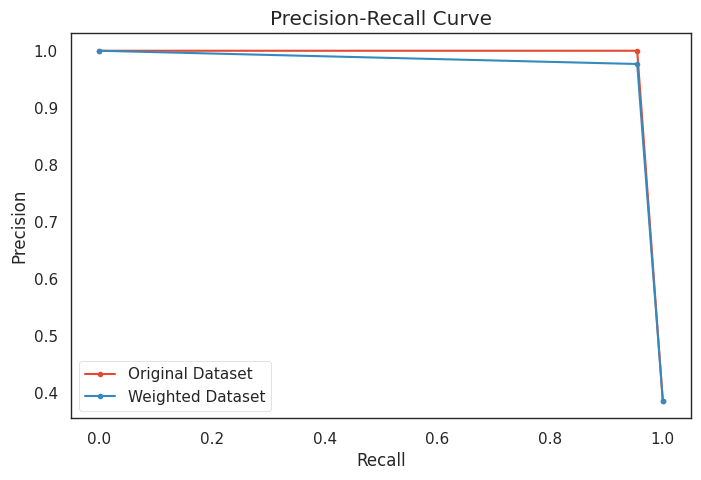

In [64]:
# Plot all P-R curves into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_PR(ax, y_test, y_pred, 'Original Dataset')
plot_PR(ax, y_test, y_pred_weighted, 'Weighted Dataset')

## K Neighbors Classifier (KNN)

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# Evaluate on original data

# Fit the data
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Model predictions
y_pred = knn.predict(X_test)

# Evaluate model performance
knn_precision = precision_score(y_test, y_pred)
print(f'Precision score: {knn_precision*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print()
print(f'Classification report: \n{classification_report(y_test, y_pred)}')

Precision score: 95.23809523809523%

Confusion matrix: 
[[68  2]
 [ 4 40]]

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.95      0.91      0.93        44

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Support Vector Machine (SVM)

In [67]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [68]:
svc = SVC(probability=True, random_state=42)
parameters = {'gamma' : [0.0001, 0.001, 0.01, 0.1],
              'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]}

grid_search = GridSearchCV(svc, parameters, cv = 5, n_jobs = -1, verbose = 1, scoring='precision')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]},
             scoring='precision', verbose=1)

In [69]:
# Get best parameters

grid_search.best_params_

{'C': 0.05, 'gamma': 0.1}

In [70]:
# Get best score

grid_search.best_score_

1.0

In [71]:
# Evaluate on original data

# Fit the data
svc = SVC(C = 0.05, gamma = 0.1, probability=True, random_state=42)
svc.fit(X_train, y_train)

# Model predictions
y_pred = svc.predict(X_test)

# Evaluate model performance
svc_precision = precision_score(y_test, y_pred)
print(f'Precision score: {svc_precision*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print()
print(f'Classification report: \n{classification_report(y_test, y_pred)}')

Precision score: 100.0%

Confusion matrix: 
[[70  0]
 [17 27]]

Classification report: 
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        70
           1       1.00      0.61      0.76        44

    accuracy                           0.85       114
   macro avg       0.90      0.81      0.83       114
weighted avg       0.88      0.85      0.84       114



In [72]:
# Weighted class

# Train a SVC model with class weighting
model = SVC(C = 0.05, gamma = 0.1, probability=True, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_weighted = model.predict(X_test)

# Evaluate model performance
svc_precision_weighted = precision_score(y_test, y_pred_weighted)

# Print classification report
print(f'Precision score: {svc_precision_weighted*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred_weighted)}')
print()
print(classification_report(y_test, y_pred_weighted))

Precision score: 76.47058823529412%

Confusion matrix: 
[[58 12]
 [ 5 39]]

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        70
           1       0.76      0.89      0.82        44

    accuracy                           0.85       114
   macro avg       0.84      0.86      0.85       114
weighted avg       0.86      0.85      0.85       114



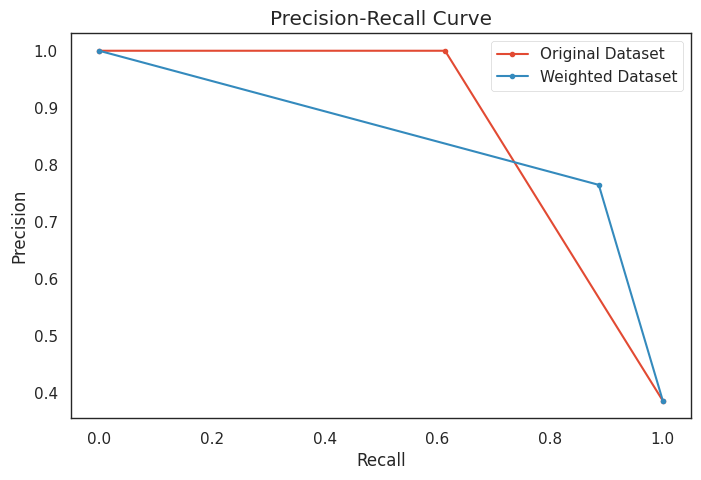

In [73]:
# Plot all P-R curves into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_PR(ax, y_test, y_pred, 'Original Dataset')
plot_PR(ax, y_test, y_pred_weighted, 'Weighted Dataset')

## Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtc = DecisionTreeClassifier()

parameters = {'criterion' : ['gini', 'entropy'],
              'max_depth' : range(2, 32, 1),
              'min_samples_leaf' : range(1, 10, 1),
              'min_samples_split' : range(2, 10, 1),
              'splitter' : ['best', 'random']}

grid_search_dt = GridSearchCV(dtc, parameters, cv = 5, n_jobs = -1, verbose = 1, scoring = 'precision')
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             scoring='precision', verbose=1)

In [76]:
# Get best parameters
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 7,
 'min_samples_split': 9,
 'splitter': 'random'}

In [77]:
# Get best score

grid_search_dt.best_score_

0.9859605911330049

In [103]:
# Evaluate on original data
dtc = DecisionTreeClassifier(criterion= 'entropy',
                            max_depth= 3,
                            min_samples_leaf= 7,
                            min_samples_split= 9,
                            splitter= 'random',
                            random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

# Evaluate model performance
dtc_precision = precision_score(y_test, y_pred)
print(f'Precision score: {dtc_precision*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print()
print(f'Classification report: \n{classification_report(y_test, y_pred)}')

Precision score: 96.875%

Confusion matrix: 
[[69  1]
 [13 31]]

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91        70
           1       0.97      0.70      0.82        44

    accuracy                           0.88       114
   macro avg       0.91      0.85      0.86       114
weighted avg       0.89      0.88      0.87       114



In [104]:
# Weighted class

# Train a DTC model with class weighting
model = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3,
                              min_samples_leaf=7,
                              min_samples_split=9,
                              splitter='random',
                              class_weight='balanced',
                              random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_weighted = model.predict(X_test)

# Evaluate model performance
dtc_precision_weighted = precision_score(y_test, y_pred_weighted)

# Print classification report
print(f'Precision score: {dtc_precision_weighted*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred_weighted)}')
print()
print(classification_report(y_test, y_pred_weighted))

Precision score: 75.0%

Confusion matrix: 
[[56 14]
 [ 2 42]]

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        70
           1       0.75      0.95      0.84        44

    accuracy                           0.86       114
   macro avg       0.86      0.88      0.86       114
weighted avg       0.88      0.86      0.86       114



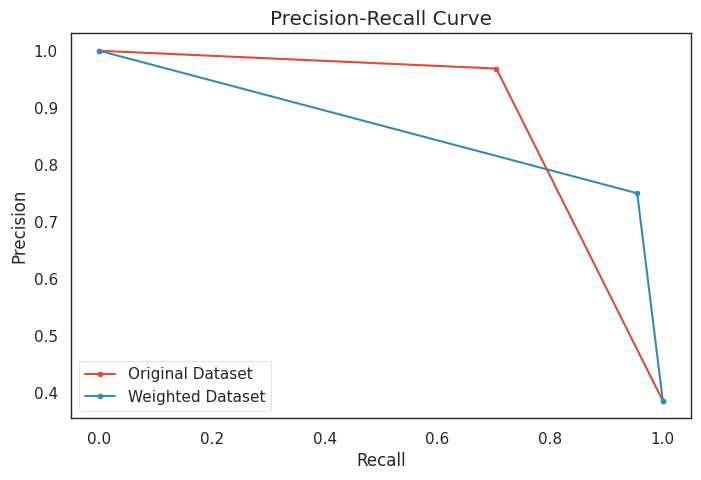

In [105]:
# Plot all P-R curves into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_PR(ax, y_test, y_pred, 'Original Dataset')
plot_PR(ax, y_test, y_pred_weighted, 'Weighted Dataset')

## Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
parameters = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

grid_search_rfc = GridSearchCV(rfc, parameters, cv = 5, n_jobs = -1, verbose = 1, scoring = 'precision')
grid_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [100, 111, 122, 133, 144, 155, 166,
                                          177, 188, 200]},
             scoring='precision', verbose=1)

In [83]:
# Get best parameters
grid_search_rfc.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 133}

In [84]:
# Get best score
grid_search_rfc.best_score_

0.99375

In [106]:
rfc = RandomForestClassifier(criterion = 'entropy',
                            bootstrap = True,
                            max_depth = 30,
                            max_features = 'auto',
                            min_samples_leaf = 1,
                            min_samples_split = 3,
                            n_estimators = 133,
                            random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Evaluate model performance
rfc_precision = precision_score(y_test, y_pred)
print(f'Precision score: {rfc_precision*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print()
print(f'Classification report: \n{classification_report(y_test, y_pred)}')

Precision score: 95.34883720930233%

Confusion matrix: 
[[68  2]
 [ 3 41]]

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        70
           1       0.95      0.93      0.94        44

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [107]:
# Weighted class

# Train a RFC model with class weighting
model = RandomForestClassifier(criterion = 'entropy',
                              max_depth = 30,
                              max_features = 'auto',
                              min_samples_leaf = 1,
                              min_samples_split = 3,
                              n_estimators = 133,
                              class_weight='balanced',
                              random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_weighted = model.predict(X_test)

# Evaluate model performance
rfc_precision_weighted = precision_score(y_test, y_pred_weighted)

# Print classification report
print(f'Precision score: {rfc_precision_weighted*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred_weighted)}')
print()
print(classification_report(y_test, y_pred_weighted))

Precision score: 95.23809523809523%

Confusion matrix: 
[[68  2]
 [ 4 40]]

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.95      0.91      0.93        44

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



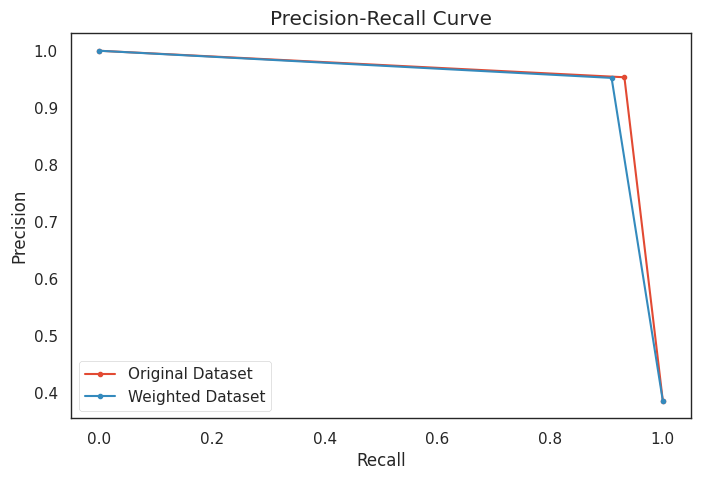

In [108]:
# Plot all P-R curves into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_PR(ax, y_test, y_pred, 'Original Dataset')
plot_PR(ax, y_test, y_pred_weighted, 'Weighted Dataset')

## Gradient Boosting Classifier

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gbc = GradientBoostingClassifier()

parameters = {'loss': ['deviance', 'exponential'],
              'learning_rate': [0.001, 0.01, 0.1],
              'n_estimators': [100, 150, 180]}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1, scoring='precision')
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             scoring='precision', verbose=1)

In [90]:
# Get best parameters

grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 150}

In [91]:
# Get best score

grid_search_gbc.best_score_

0.9586519607843138

In [109]:
gbc = GradientBoostingClassifier(learning_rate = 0.1,
                                loss = 'deviance',
                                n_estimators = 150,
                                random_state=42)

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

# Evaluate model performance
gbc_precision = precision_score(y_test, y_pred)
print(f'Precision score: {gbc_precision*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print()
print(f'Classification report: \n{classification_report(y_test, y_pred)}')

Precision score: 95.23809523809523%

Confusion matrix: 
[[68  2]
 [ 4 40]]

Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.95      0.91      0.93        44

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Extreme Gradient Boosting

In [93]:
from xgboost import XGBClassifier

In [94]:
xgbc = XGBClassifier(objective='binary:logistic')

parameters = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750]}

grid_search_xgbc = GridSearchCV(xgbc,
                                parameters,
                                cv = 5,
                                n_jobs = -5,
                                verbose = 1,
                                scoring = 'precision')

grid_search_xgbc.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-5,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 10, 15],
                         'n_estimators': [100, 250, 500, 750],
                         'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='precision', verbose=1)

In [95]:
# Get best parameters

grid_search_xgbc.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.6}

In [96]:
# Get best score

grid_search_xgbc.best_score_

0.9722819593787335

In [97]:
xgbc = XGBClassifier(objective = 'binary:logistic',
                   learning_rate = 0.01,
                   max_depth = 3,
                   n_estimators = 100,
                   subsample = 0.6,
                   random_state=42)

xgbc.fit(X_train, y_train)

y_pred = xgbc.predict(X_test)

# Evaluate model performance
xgbc_precision = precision_score(y_test, y_pred)
print(f'Precision score: {xgbc_precision*100}%')
print()
print(f'Confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
print()
print(f'Classification report: \n{classification_report(y_test, y_pred)}')

Precision score: 95.34883720930233%

Confusion matrix: 
[[68  2]
 [ 3 41]]

Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        70
           1       0.95      0.93      0.94        44

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Models evaluation

During the modeling stage, the class weighing method was employed; however, the results indicate that it does not enhance performance. Consequently, the results from the weighted-class models are not being considered for the final model evaluation.

In [113]:
from sklearn.metrics import average_precision_score

In [112]:
models = [{'label': 'LR',
           'model': log_reg,},

          {'label': 'DTC',
           'model': dtc,},

          {'label': 'SVM',
           'model': svc,},

          {'label': 'KNN',
           'model': knn,},

          {'label': 'XGBoost',
           'model': xgbc,},

          {'label': 'RFC',
           'model': rfc,},

          {'label': 'GBDT',
           'model': gbc,}]

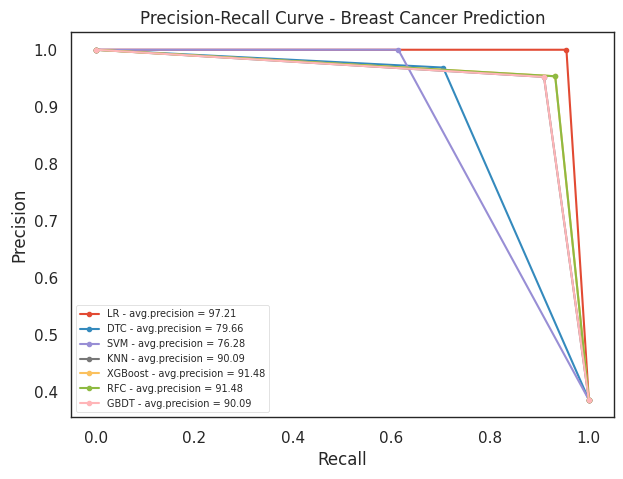

In [116]:
# Check the algorithm performance based on the Average Precision Score

plt.figure(figsize=(7,5))

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_pred)

    plt.plot(lr_recall, lr_precision, marker='.', label=f'{m["label"]} - avg.precision = {avg_precision*100:.2f}')

plt.title('Precision-Recall Curve - Breast Cancer Prediction', fontsize=12)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left", fontsize=7)
plt.show()

**Analysis**:
* The area under the Precision-Recall Curve (AUC-PR) is a performance metric for binary classification models, **especially in imbalanced datasets**.
* A higher AUC-PR value generally indicates better performance, reflecting the model's ability to achieve high precision while maintaining high recall.
* The more the Precision-Recall Curve **tends toward the upper-right corner**, the better the model is performing.
* Bese on `Average Precision Score` indicator, we can see from the plot that the well performed models are **Logistic Regression**, **Random Forest Tree**, and **XGBoost**.

In [117]:
# Evaluate models' final performance
model_df = pd.DataFrame({'Model': ['Logistic Regression',
                                   'KNN',
                                   'SVM',
                                   'Decision Tree Classifier',
                                   'Random Forest Classifier',
                                   'Gradient Boosting Classifier',
                                   'XgBoost'],
                         'Precision_score': [100*round(log_reg_precision, 4),
                                             100*round(knn_precision, 4),
                                             100*round(svc_precision, 4),
                                             100*round(dtc_precision, 4),
                                             100*round(rfc_precision, 4),
                                             100*round(gbc_precision, 4),
                                             100*round(xgbc_precision, 4)]})

model_df = model_df.sort_values(by = 'Precision_score', ascending = False)
model_df

Model  Precision_score
0           Logistic Regression           100.00
2                           SVM           100.00
3      Decision Tree Classifier            96.88
4      Random Forest Classifier            95.35
6                       XgBoost            95.35
1                           KNN            95.24
5  Gradient Boosting Classifier            95.24

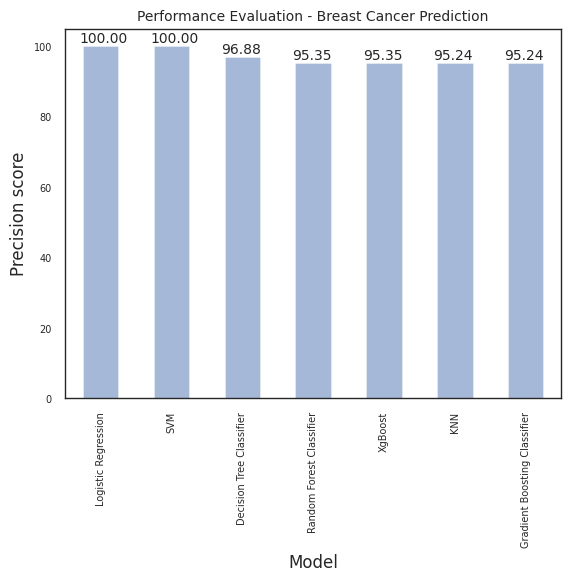

In [111]:
ax = model_df.set_index(model_df.Model).plot(kind='bar', fontsize=7, color='b', alpha=0.5,
                                             legend=False,
                                             ylabel='Precision score')
x_offset = -0.3
y_offset = 1
for p in ax.patches:
    b = p.get_bbox()
    val = f"{b.y1 + b.y0:.2f}"
    ax.annotate(val, ((b.x0 + b.x1)/2+x_offset, b.y1 + y_offset))

plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=10)
plt.show()

# Conclusion

* In the modeling phase, we utilized seven different algorithms, and a significant number of them exhibited satisfactory performance.

* Upon thorough examination of the model outputs, **Logistic Regression** and **Support Vector Machine** algorithms emerged as the preferred choices, consistently yielding the most favorable results.

* However, it is noteworthy that, in this case, the weighted class technique did not contribute to an improvement in model performance.